In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
df = pd.read_csv('UpdatedEnrollmentDataFrame.csv')
df.head(5)

,Reference ID,Record Created Date,Primary Inquiry Program,Primary Inquiry Term,Application Referral Source,Application Created Date,Application Status,Application Program,Application Start Term,Decisions Released Date,...,Race,Sex,Intend to apply for financial aid,Applications Registered in Colleague,Applications Scholarship Tier - Admit,GPA (Recalculated) Category,GPA (Converted) Category,Tier Number,Scholarship Amount,Scholarship Category
0,826319459,2018-10-19 13:17:00,Business Analytics - MSBA - Online Instruction,Spring 2024,SU Web Site,2016-10-14 00:00:00,Decided,Business Administration (Professional) - MBA,Fall 2017,2019-01-05 19:00:00,...,More than one race,M,1,0,Not valid for Award,Unknown,Medium (2.5-3.5),NaN,NaN,Not valid for Award
1,295633352,2018-10-19 13:17:00,Business Analytics - MSBA,Fall 2018,No referral provided,2017-12-27 00:00:00,Decided,Business Analytics - MSBA,Fall 2018,2019-02-05 12:39:00,...,Unknown,F,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award
2,173111,2023-12-03 06:54:00,Business Administration (Professional) - MBA,Winter 2024,Graduate Programs Search,2023-12-03 06:56:00,Decided,Business Administration (Professional) - MBA,Winter 2024,2024-10-01 14:15:00,...,Black or African American,M,1,0,2023-G5 - $6000,Unknown,Unknown,5.0,6000.0,Awarded $4800-$7200
3,368489358,2018-10-19 13:04:00,Sport Business Leadership- MSBL,Summer 2017,No referral provided,2017-01-24 00:00:00,Decided,Sport Business Leadership- MSBL,Summer 2017,2019-02-05 12:47:00,...,White - Caucasian/European,M,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award
4,490429256,2018-10-19 13:17:00,Accounting (Professional) - MPAC,Summer 2017,No referral provided,2017-09-03 00:00:00,Decided,Accounting (Professional) - MPAC,Summer 2017,2019-02-05 12:47:00,...,White - Caucasian/European,F,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award


In [80]:
# Filter the dataframe for enrolled students
colleague_enrolled_all = (
    (df['Applications Registered in Colleague'] == 1))

colleague_enrolled_all = df[colleague_enrolled_all]

# Now `actual_enrolled` contains the subset of the data
colleague_enrolled_all.head()
len(colleague_enrolled_all)

1396

In [81]:
# Filter the dataframe for  decided unenrolled students
colleague_unenrolled_decided = (
    (df['Applications Registered in Colleague'] == 0) & (df['Application Status'] == 'Decided'))

colleague_unenrolled_decided = df[colleague_unenrolled_decided]

# Now `actual_enrolled` contains the subset of the data
colleague_unenrolled_decided.head()
len(colleague_unenrolled_decided)

4278

In [82]:
# Filter the dataframe for actual enrolled students
colleague_unenrolled_all = (
    (df['Applications Registered in Colleague'] == 0))

colleague_unenrolled_all = df[colleague_unenrolled_all]

# Now `actual_enrolled` contains the subset of the data
colleague_unenrolled_all.head()
len(colleague_unenrolled_all)

8904

In [83]:
# Filter the dataframe for actual enrolled students
actual_enrolled = (
    (df['Applications Registered in Colleague'] == 1) &
    (df['Decision Reason'].isin([
        'Admit Conditional',
        'Scholarship Adjustment',
        'Admit Regular',
        'Admit Probation',
        'Admit Conditional & Bridge'
        'Admit Conditional & Probationary'
        'Update Term - Post Enroll(CF)',
        'Update Major - Post Enroll(CF)',
        'Update Term & Major - Post Enroll(CF)'
        'Deposit Paid',
        'Deposit - Not Required',
        'Deposit Waived/Not Required'
    ]))
)

actual_enrolled = df[actual_enrolled]

# Now `actual_enrolled` contains the subset of the data
actual_enrolled.head()
len(actual_enrolled)

1263

In [ ]:


# Assume data columns are named 'Primary Inquiry Program' and 'Application Program'
# Check if both columns exist to prevent errors
if 'Primary Inquiry Program' in df.columns and 'Application Program' in df.columns:
    # Create a new column that is True if both entries match, otherwise False
    df['Match'] = df['Primary Inquiry Program'] == df['Application Program']

    # Calculate the number of matches
    num_matches = df['Match'].sum()

    # Calculate the total number of inquiries
    total_inquiries = len(df)

    # Calculate the conversion rate
    conversion_rate = (num_matches / total_inquiries) * 100

    print(f"Number of Matches: {num_matches}")
    print(f"Total Inquiries: {total_inquiries}")
    print(f"Conversion Rate: {conversion_rate:.2f}%")
else:
    print("Columns 'Primary Inquiry Program' and/or 'Application Program' not found in the dataframe.")


Number of Matches: 9860
Total Inquiries: 10300
Conversion Rate: 95.73%


TypeError: text() missing 1 required positional argument: 's'

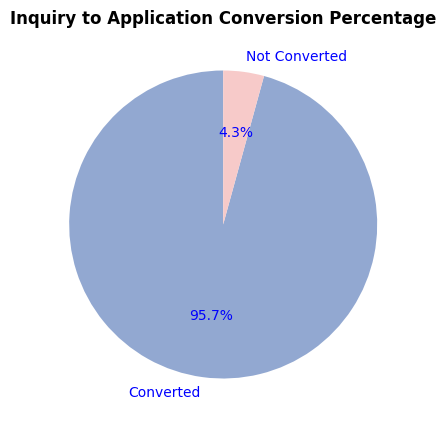

In [98]:
# Check if both columns exist to prevent errors
if 'Primary Inquiry Program' in df.columns and 'Application Program' in df.columns:
    # Create a new column that is True if both entries match, otherwise False
    df['Match'] = df['Primary Inquiry Program'] == df['Application Program']

# Count the number of matches and non-matches
    match_counts = df['Match'].value_counts(normalize=True) * 100  # Convert counts to percentages

    # Plotting
    plt.figure(figsize=(10, 5))
    match_counts.plot(kind='pie', labels=['Converted', 'Not Converted'], autopct='%1.1f%%',
                      startangle=90, colors=['#92a8d1', '#f7cac9'], textprops={'color':"b"})
    
    plt.title('Inquiry to Application Conversion Percentage', fontweight='bold')
    plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
    plt.text(' ', ' ',fontweight='bold')
    plt.show()
    
else:
    print("Columns 'Primary Inquiry Program' and/or 'Application Program' not found in the dataframe.")

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/1408702339.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=average_processing_time.values, y=average_processing_time.index, palette='coolwarm')


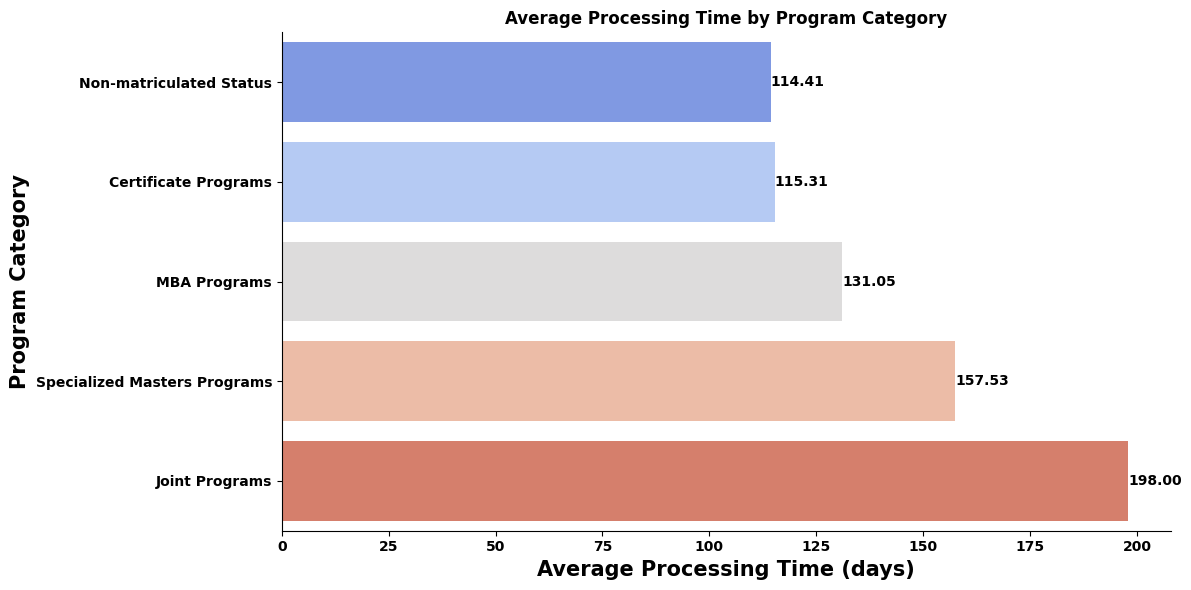

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define program categories mapping
program_categories = {
    'MBA Programs': [
        'Business Administration (Professional) - MBA',
        'Leadership Executive Master of Business Administration - MBA',
        'Business Administration - Bridge - MBA',
        'Business Administration (Professional) - MBA - Online Instruction',
        'Early Career Masters of Business Administration',
        'Sport and Entertainment Management - MBA'
    ],
    'Specialized Masters Programs': [
        'Finance - MSF',
        'Business Analytics - MSBA',
        'Accounting and Analytics - MS',
        'Sport Business Leadership- MSBL',
        'Business Analytics - MSBA - Online Instruction',
        'Accounting (Professional) - MPAC',
        'Accounting (Professional) - MPAC Advanced',
        'Business Analytics with Finance degrees - MSBA/MSF'
    ],
    'Certificate Programs': [
        'Executive Leadership Certificate',
        'Business Analytics Certificate',
        'Marketing Certificate',
        'Finance Certificate',
        'Accounting Certificate',
        'Global Business Certificate',
        'Business Administration Certificate',
        'Leadership Formation Certificate'
    ],
    'Joint Programs': [
        'Business Administration (Professional), joint Juris Doctor - MBA/JD',
        'Accounting, Joint Juris Doctor - MPAC/JD',
        'Sport Business Leadership, joint Juris Doctor - MSBL/JD'
    ],
    'Non-matriculated Status': [
        'Non-Matriculated status - Albers School of Business and Economics'
    ]
}

# Invert the dictionary to map programs to their categories
program_to_category = {program: category for category, programs in program_categories.items() for program in programs}

# Assuming df is your DataFrame containing the actual_enrolled data
# Map the 'Application Program' to 'Program Category'
df['Program Category'] = df['Application Program'].map(program_to_category)

# Convert date fields to datetime
df['Application Created Date'] = pd.to_datetime(df['Application Created Date'], errors='coerce')
df['Decisions Released Date'] = pd.to_datetime(df['Decisions Released Date'], errors='coerce')

# Calculate processing times
df['Processing Time (days)'] = (df['Decisions Released Date'] - df['Application Created Date']).dt.days

# Group by 'Program Category' and calculate average processing time
average_processing_time = df.groupby('Program Category')['Processing Time (days)'].mean().sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=average_processing_time.values, y=average_processing_time.index, palette='coolwarm')

# Add data labels to each bar
for bar in bar_plot.patches:
    plt.text(
        bar.get_width(),  # Position data label at the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the label vertically
        f'{bar.get_width():.2f}',  # Format the number to 2 decimal places
        va='center', fontweight='bold'
    )

plt.title('Average Processing Time by Program Category', fontweight='bold')
plt.xlabel('Average Processing Time (days)', fontweight='bold', fontsize=15 )
plt.ylabel('Program Category', fontweight='bold', fontsize=15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
sns.despine(left=False, bottom=False)  # To remove the borders
plt.show()


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/2149670435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colleague_enrolled_all['Age Group'] = pd.cut(colleague_enrolled_all['Age'], bins=age_bins, labels=age_labels, right=False)
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/2149670435.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colleague_unenrolled_decided['Age Group'] = pd.cut(colleague_unenrolled_decided['Age'], bins=age_bins, labels=age_labels, right=Fal

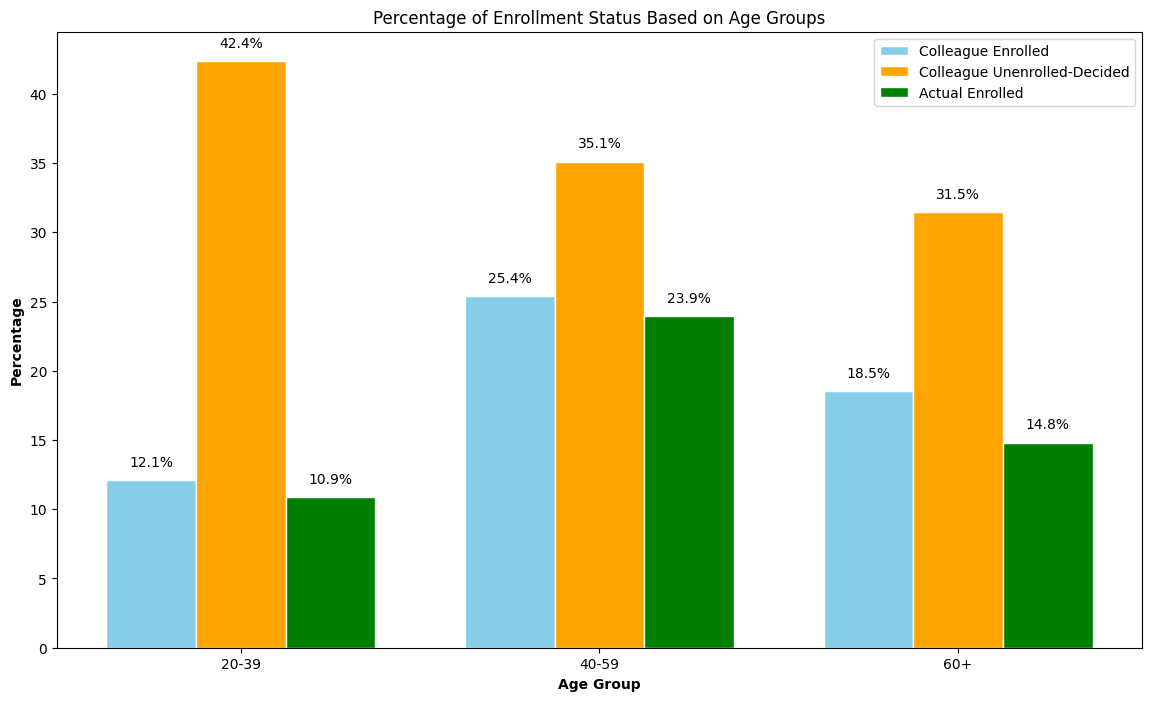

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define age bins and labels
age_bins = [20, 40, 60, 80]
age_labels = ['20-39', '40-59', '60+']

# Add 'Age Group' category to the whole DataFrame and subsets
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
colleague_enrolled_all['Age Group'] = pd.cut(colleague_enrolled_all['Age'], bins=age_bins, labels=age_labels, right=False)
colleague_unenrolled_decided['Age Group'] = pd.cut(colleague_unenrolled_decided['Age'], bins=age_bins, labels=age_labels, right=False)
actual_enrolled['Age Group'] = pd.cut(actual_enrolled['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the percentages of each subset per age group as a percentage of the total data
enrolled_percentages = (colleague_enrolled_all['Age Group'].value_counts() / df['Age Group'].value_counts() * 100).reindex(age_labels, fill_value=0)
unenrolled_percentages = (colleague_unenrolled_decided['Age Group'].value_counts() / df['Age Group'].value_counts() * 100).reindex(age_labels, fill_value=0)
actual_enrolled_percentages = (actual_enrolled['Age Group'].value_counts() / df['Age Group'].value_counts() * 100).reindex(age_labels, fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = np.arange(len(age_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars for each enrollment status
ax.bar(r1, enrolled_percentages, color='skyblue', width=bar_width, edgecolor='white', label='Colleague Enrolled')
ax.bar(r2, unenrolled_percentages, color='orange', width=bar_width, edgecolor='white', label='Colleague Unenrolled-Decided')
ax.bar(r3, actual_enrolled_percentages, color='green', width=bar_width, edgecolor='white', label='Actual Enrolled')

# Add labels on top of the bars
for xpos, percentages in zip([r1, r2, r3], [enrolled_percentages, unenrolled_percentages, actual_enrolled_percentages]):
    for pos, perc in zip(xpos, percentages):
        if perc > 0:  # Only add labels if the percentage is greater than 0
            ax.annotate(f'{perc:.1f}%', (pos, perc), textcoords="offset points", xytext=(0,10), ha='center')

# Labels, title and legend
ax.set_xlabel('Age Group', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(enrolled_percentages))], age_labels)
ax.set_ylabel('Percentage', fontweight='bold')
ax.set_title('Percentage of Enrollment Status Based on Age Groups')

plt.legend()
plt.show()


Total trend for programs

Yearly trend for programs

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35342/1643235939.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_enrolled['Program Category'] = actual_enrolled['Application Program'].map(category_map)
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35342/1643235939.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_enrolled['Year'] = pd.to_datetime(actual_enrolled['Decisions Released Date'], errors='coerce').dt.year


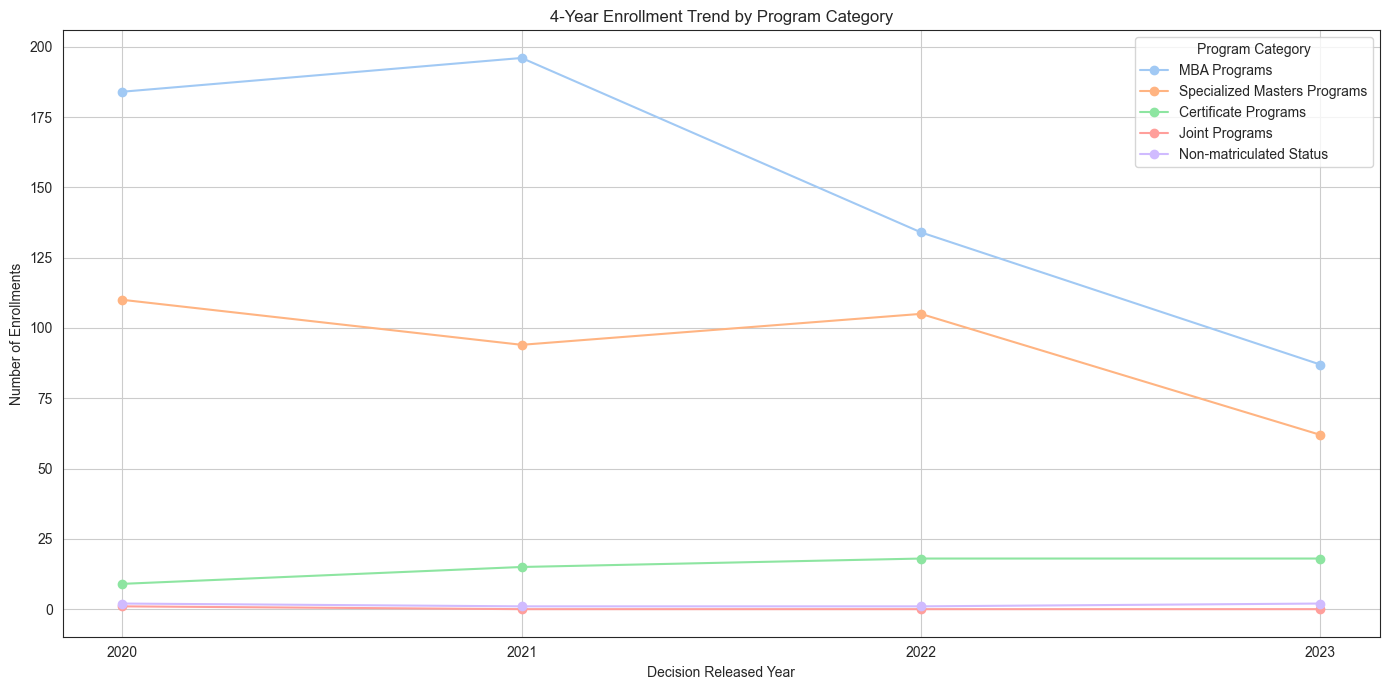

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'actual_enrolled' DataFrame is pre-defined and contains an 'Application Program' and 'Decisions Released Date' column.

# Define program categories
program_categories = {
    'MBA Programs': ['Business Administration (Professional) - MBA', 'Leadership Executive Master of Business Administration - MBA',
                     'Business Administration - Bridge - MBA', 'Business Administration (Professional) - MBA - Online Instruction',
                     'Early Career Masters of Business Administration', 'Sport and Entertainment Management - MBA'],
    'Specialized Masters Programs': ['Finance - MSF', 'Business Analytics - MSBA', 'Accounting and Analytics - MS',
                                     'Sport Business Leadership- MSBL', 'Business Analytics - MSBA - Online Instruction',
                                     'Accounting (Professional) - MPAC', 'Accounting (Professional) - MPAC Advanced',
                                     'Business Analytics with Finance degrees - MSBA/MSF'],
    'Certificate Programs': ['Executive Leadership Certificate', 'Business Analytics Certificate', 'Marketing Certificate',
                             'Finance Certificate', 'Accounting Certificate', 'Global Business Certificate',
                             'Business Administration Certificate', 'Leadership Formation Certificate'],
    'Joint Programs': ['Business Administration (Professional), joint Juris Doctor - MBA/JD',
                       'Accounting, Joint Juris Doctor - MPAC/JD', 'Sport Business Leadership, joint Juris Doctor - MSBL/JD'],
    'Non-matriculated Status': ['Non-Matriculated status - Albers School of Business and Economics']
}

# Map each program to its category
category_map = {program: category for category, programs in program_categories.items() for program in programs}
actual_enrolled['Program Category'] = actual_enrolled['Application Program'].map(category_map)

# Convert 'Decisions Released Date' to datetime and extract the year
actual_enrolled['Year'] = pd.to_datetime(actual_enrolled['Decisions Released Date'], errors='coerce').dt.year

# Ensure the DataFrame is filtered for the years 2020-2023 and non-null years
actual_enrolled_filtered = actual_enrolled[actual_enrolled['Year'].between(2020, 2023) & actual_enrolled['Year'].notnull()]

# Group data by 'Year' and 'Program Category' and count the number of enrollments
enrollment_trend = actual_enrolled_filtered.groupby(['Year', 'Program Category']).size().reset_index(name='Count')

# Pivot the data for plotting
enrollment_pivot = enrollment_trend.pivot(index='Year', columns='Program Category', values='Count').fillna(0)

# Plot
plt.figure(figsize=(14, 7))
for category in program_categories.keys():
    if category in enrollment_pivot.columns:
        plt.plot(enrollment_pivot.index, enrollment_pivot[category], marker='o', label=category)

plt.title('4-Year Enrollment Trend by Program Category')
plt.xlabel('Decision Released Year')
plt.ylabel('Number of Enrollments')
plt.xticks(range(2020, 2024))
plt.legend(title='Program Category')
plt.grid(True)
plt.tight_layout()
plt.show()



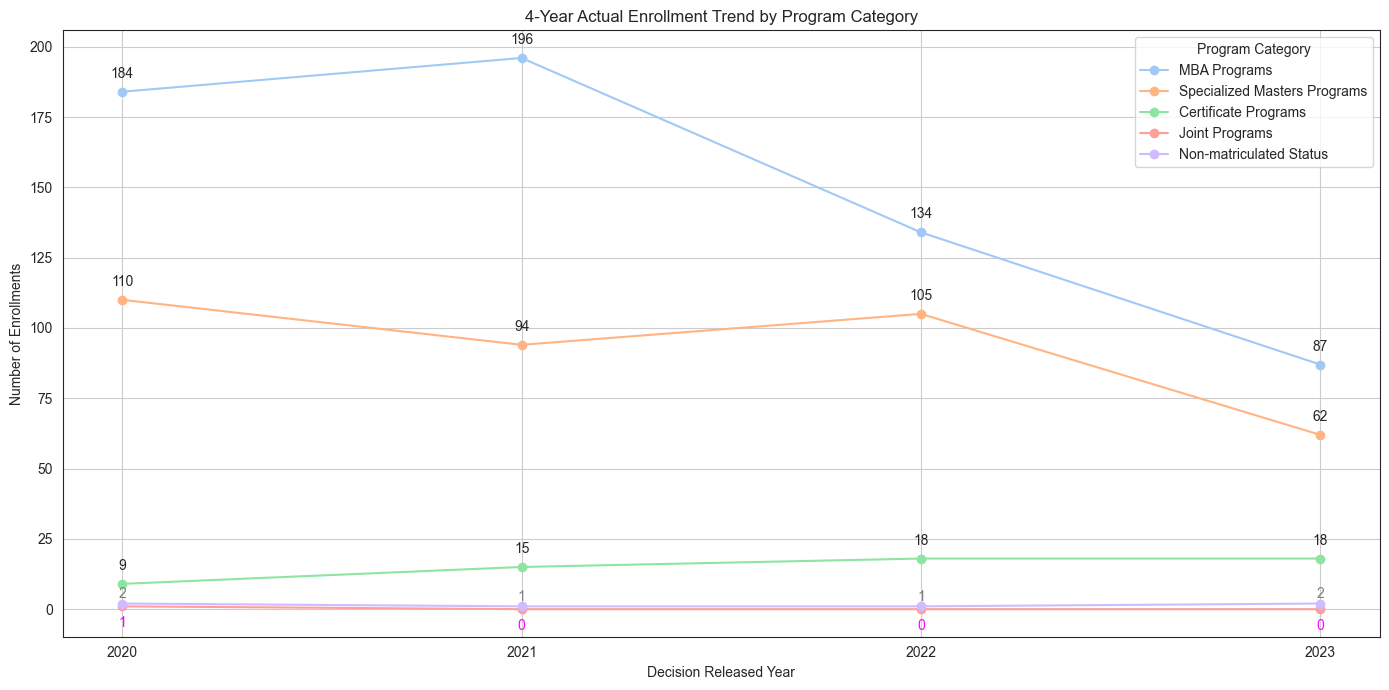

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'actual_enrolled' DataFrame is pre-defined and contains an 'Application Program' and 'Decisions Released Date' column.

# Define program categories
program_categories = {
    'MBA Programs': ['Business Administration (Professional) - MBA', 'Leadership Executive Master of Business Administration - MBA',
                     'Business Administration - Bridge - MBA', 'Business Administration (Professional) - MBA - Online Instruction',
                     'Early Career Masters of Business Administration', 'Sport and Entertainment Management - MBA'],
    'Specialized Masters Programs': ['Finance - MSF', 'Business Analytics - MSBA', 'Accounting and Analytics - MS',
                                     'Sport Business Leadership- MSBL', 'Business Analytics - MSBA - Online Instruction',
                                     'Accounting (Professional) - MPAC', 'Accounting (Professional) - MPAC Advanced',
                                     'Business Analytics with Finance degrees - MSBA/MSF'],
    'Certificate Programs': ['Executive Leadership Certificate', 'Business Analytics Certificate', 'Marketing Certificate',
                             'Finance Certificate', 'Accounting Certificate', 'Global Business Certificate',
                             'Business Administration Certificate', 'Leadership Formation Certificate'],
    'Joint Programs': ['Business Administration (Professional), joint Juris Doctor - MBA/JD',
                       'Accounting, Joint Juris Doctor - MPAC/JD', 'Sport Business Leadership, joint Juris Doctor - MSBL/JD'],
    'Non-matriculated Status': ['Non-Matriculated status - Albers School of Business and Economics']
}

# Map each program to its category
category_map = {program: category for category, programs in program_categories.items() for program in programs}

# Ensure you're operating on a DataFrame that won't raise SettingWithCopyWarning
actual_enrolled.loc[:, 'Program Category'] = actual_enrolled['Application Program'].map(category_map)

# Convert 'Decisions Released Date' to datetime, extracting the year
actual_enrolled.loc[:, 'Year'] = pd.to_datetime(actual_enrolled['Decisions Released Date'], errors='coerce').dt.year

# Filter the DataFrame for specific years
actual_enrolled_filtered = actual_enrolled.loc[actual_enrolled['Year'].between(2020, 2023) & actual_enrolled['Year'].notnull()]

# Group and pivot data
enrollment_trend = actual_enrolled_filtered.groupby(['Year', 'Program Category']).size().reset_index(name='Count')
enrollment_pivot = enrollment_trend.pivot(index='Year', columns='Program Category', values='Count').fillna(0)

# Plot with annotations positioned based on their categories and formatted as integers
plt.figure(figsize=(14, 7))
for category in program_categories.keys():
    if category in enrollment_pivot.columns:
        line = plt.plot(enrollment_pivot.index, enrollment_pivot[category], marker='o', label=category)
        for i, txt in enumerate(enrollment_pivot[category].values):
            # Format the text as an integer to remove decimal places
            label = "{}".format(int(txt))
            if category == 'Non-matriculated Status':
                # Place Non-matriculated Status annotations above the line
                plt.annotate(label, (enrollment_pivot.index[i], enrollment_pivot[category].iloc[i]), textcoords="offset points", xytext=(0,4), ha='center', color='gray')
            elif category == 'Joint Programs':
                # Place Joint Programs annotations below the line
                plt.annotate(label, (enrollment_pivot.index[i], enrollment_pivot[category].iloc[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='magenta')
            else:
                # Place other annotations directly on the line
                plt.annotate(label, (enrollment_pivot.index[i], enrollment_pivot[category].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('4-Year Actual Enrollment Trend by Program Category')
plt.xlabel('Decision Released Year')
plt.ylabel('Number of Enrollments')
plt.xticks(range(2020, 2024))
plt.legend(title='Program Category')
plt.grid(True)
plt.tight_layout()
plt.show()

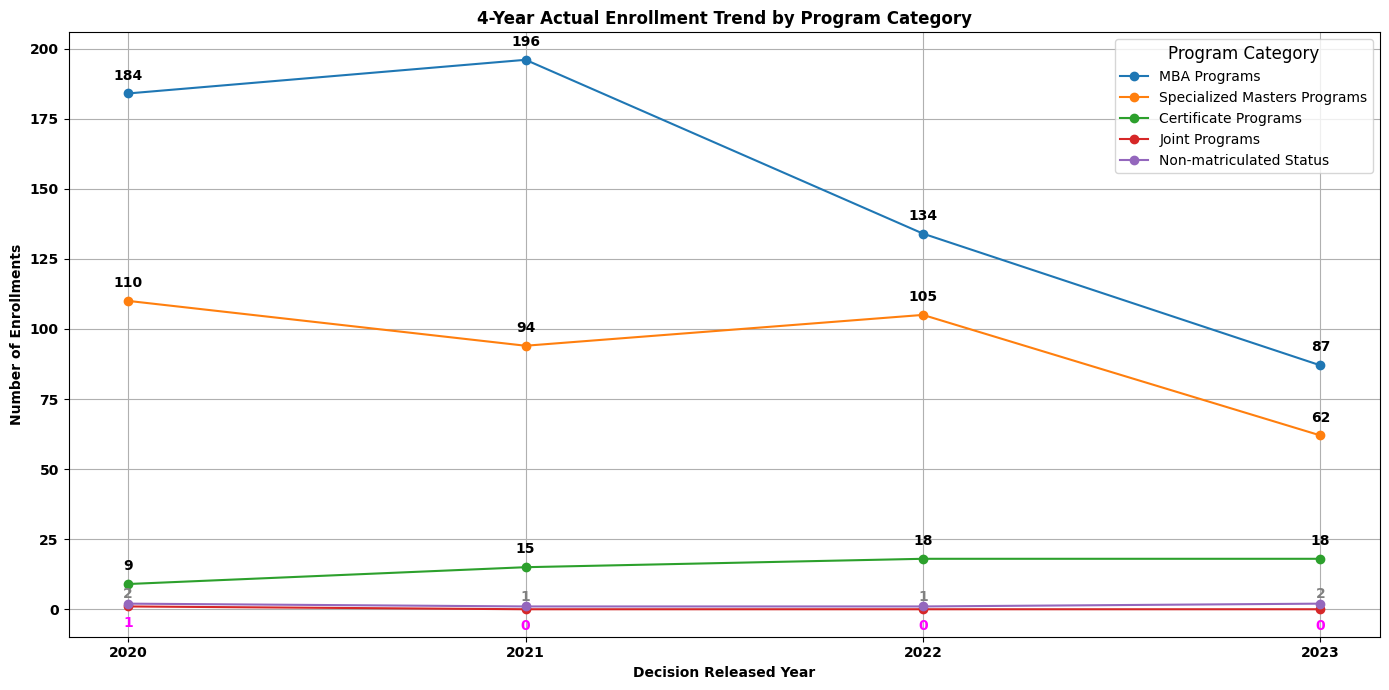

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'actual_enrolled' DataFrame is pre-defined and contains an 'Application Program' and 'Decisions Released Date' column.

# Define program categories
program_categories = {
    'MBA Programs': ['Business Administration (Professional) - MBA', 'Leadership Executive Master of Business Administration - MBA',
                     'Business Administration - Bridge - MBA', 'Business Administration (Professional) - MBA - Online Instruction',
                     'Early Career Masters of Business Administration', 'Sport and Entertainment Management - MBA'],
    'Specialized Masters Programs': ['Finance - MSF', 'Business Analytics - MSBA', 'Accounting and Analytics - MS',
                                     'Sport Business Leadership- MSBL', 'Business Analytics - MSBA - Online Instruction',
                                     'Accounting (Professional) - MPAC', 'Accounting (Professional) - MPAC Advanced',
                                     'Business Analytics with Finance degrees - MSBA/MSF'],
    'Certificate Programs': ['Executive Leadership Certificate', 'Business Analytics Certificate', 'Marketing Certificate',
                             'Finance Certificate', 'Accounting Certificate', 'Global Business Certificate',
                             'Business Administration Certificate', 'Leadership Formation Certificate'],
    'Joint Programs': ['Business Administration (Professional), joint Juris Doctor - MBA/JD',
                       'Accounting, Joint Juris Doctor - MPAC/JD', 'Sport Business Leadership, joint Juris Doctor - MSBL/JD'],
    'Non-matriculated Status': ['Non-Matriculated status - Albers School of Business and Economics']
}

# Map each program to its category
category_map = {program: category for category, programs in program_categories.items() for program in programs}

# Ensure you're operating on a DataFrame that won't raise SettingWithCopyWarning
actual_enrolled.loc[:, 'Program Category'] = actual_enrolled['Application Program'].map(category_map)

# Convert 'Decisions Released Date' to datetime, extracting the year
actual_enrolled.loc[:, 'Year'] = pd.to_datetime(actual_enrolled['Decisions Released Date'], errors='coerce').dt.year

# Filter the DataFrame for specific years
actual_enrolled_filtered = actual_enrolled.loc[actual_enrolled['Year'].between(2020, 2023) & actual_enrolled['Year'].notnull()]

# Group and pivot data
enrollment_trend = actual_enrolled_filtered.groupby(['Year', 'Program Category']).size().reset_index(name='Count')
enrollment_pivot = enrollment_trend.pivot(index='Year', columns='Program Category', values='Count').fillna(0)

# Plot with annotations positioned based on their categories and formatted as integers
plt.figure(figsize=(14, 7))
for category in program_categories.keys():
    if category in enrollment_pivot.columns:
        line = plt.plot(enrollment_pivot.index, enrollment_pivot[category], marker='o', label=category)
        for i, txt in enumerate(enrollment_pivot[category].values):
            # Format the text as an integer to remove decimal places
            label = "{}".format(int(txt))
            if category == 'Non-matriculated Status':
                # Place Non-matriculated Status annotations above the line
                plt.annotate(label, (enrollment_pivot.index[i], enrollment_pivot[category].iloc[i]), textcoords="offset points", xytext=(0,4), ha='center', color='gray', fontweight='bold')
            elif category == 'Joint Programs':
                # Place Joint Programs annotations below the line
                plt.annotate(label, (enrollment_pivot.index[i], enrollment_pivot[category].iloc[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='magenta', fontweight='bold')
            else:
                # Place other annotations directly on the line
                plt.annotate(label, (enrollment_pivot.index[i], enrollment_pivot[category].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.title('4-Year Actual Enrollment Trend by Program Category', fontweight='bold')
plt.xlabel('Decision Released Year', fontweight='bold')
plt.ylabel('Number of Enrollments', fontweight='bold')
plt.xticks(range(2020, 2024), fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title='Program Category', title_fontsize='large', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

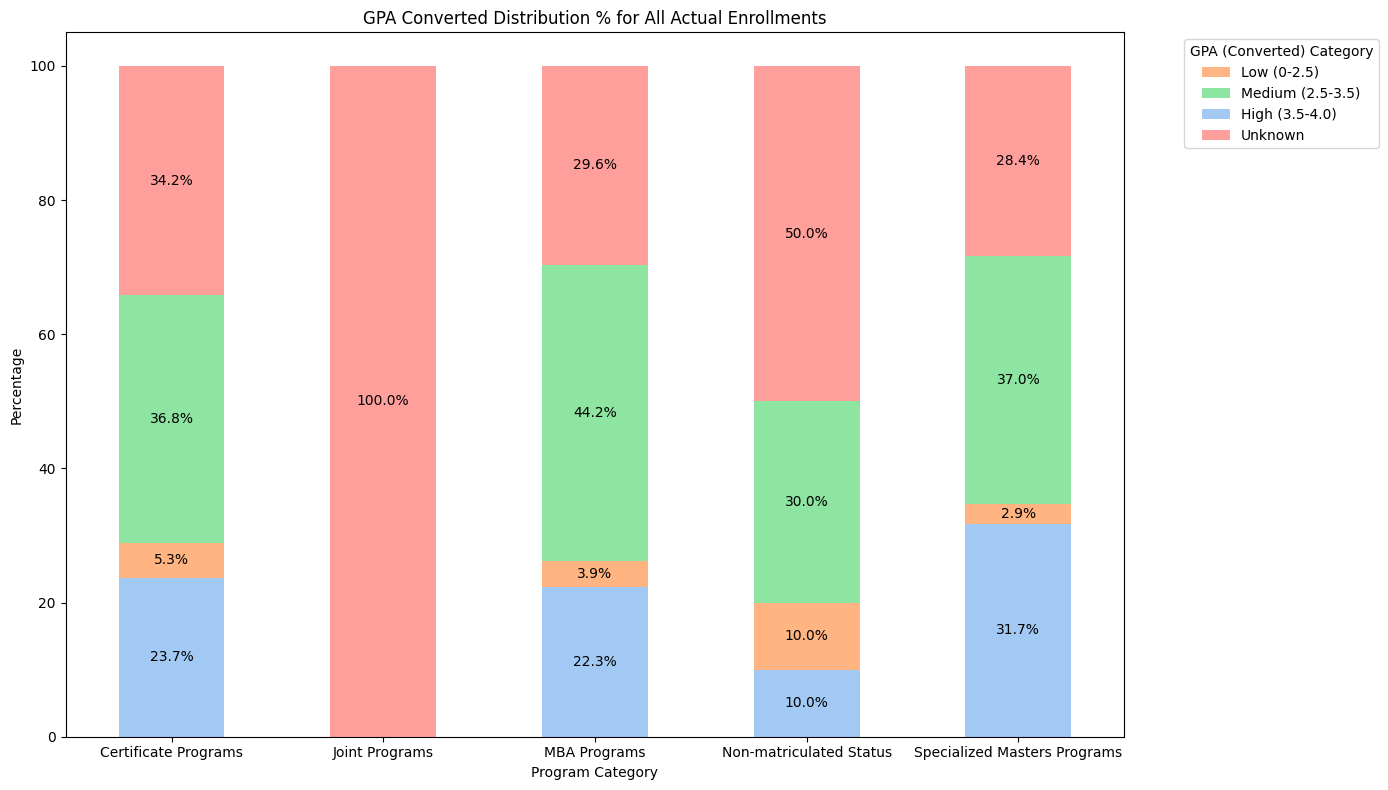

In [ ]:
# Using the provided code snippet with modifications to use subtle/light colors.

import matplotlib.pyplot as plt
import pandas as pd

# Sample data setup - replace this with actual data loading
# Assuming 'actual_enrolled' is already defined and contains the necessary columns

# Calculate the total count of each GPA category within the actual_enrolled DataFrame
total_gpa_counts = actual_enrolled['GPA (Converted) Category'].value_counts()

# Group by 'Program Category' and 'GPA (Converted) Category' and count the instances
grouped = actual_enrolled.groupby(['Program Category', 'GPA (Converted) Category']).size().reset_index(name='Counts')

# Pivot data for plotting to have 'Program Category' as rows and 'GPA (Converted) Category' as columns
pivot_data = grouped.pivot(index='Program Category', columns='GPA (Converted) Category', values='Counts').fillna(0)

# Calculate percentages for each 'GPA (Converted) Category' within each 'Program Category'
# Normalize each row by the total across all GPA categories to get percentages
pivot_percentages = pivot_data.divide(pivot_data.sum(axis=1), axis=0) * 100

# Define a color palette with subtle colors
subtle_colors = sns.color_palette("pastel")

# Define the order of categories for plotting
gpa_order = ['Low (0-2.5)', 'Medium (2.5-3.5)', 'High (3.5-4.0)', 'Unknown']

# Plot the percentages as a stacked bar chart with subtle colors
plt.figure(figsize=(14, 8))
pivot_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), color=subtle_colors)

# Add data labels
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:  # Only show labels for non-zero values
        plt.gca().text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center')

# Add labels and title
plt.xlabel('Program Category')
plt.ylabel('Percentage')
plt.title('GPA Converted Distribution % for All Actual Enrollments')

# Reorder legend to match the desired GPA order
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(label) for label in gpa_order]
plt.legend([handles[idx] for idx in order], gpa_order, title='GPA (Converted) Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)  # Rotate the x-axis labels to show them horizontally
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

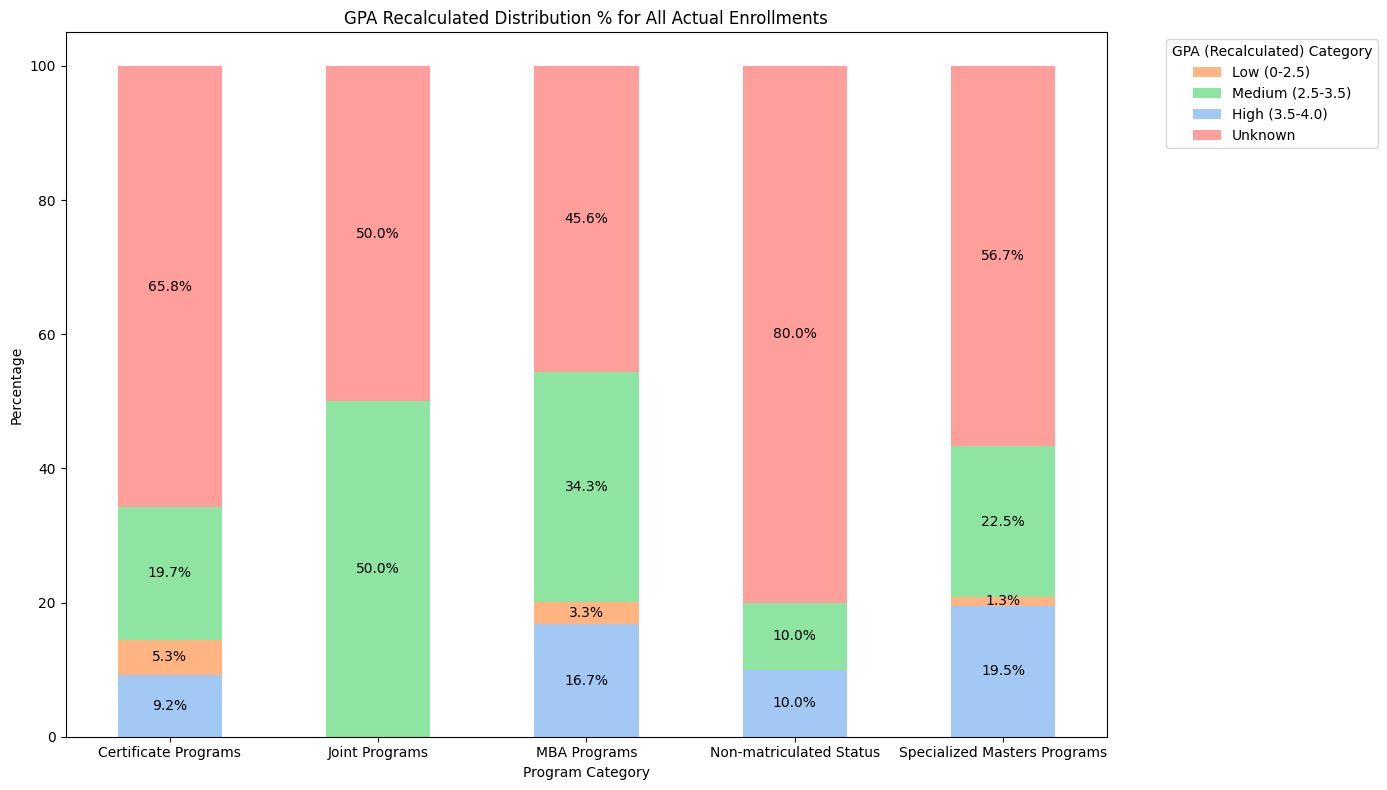

In [ ]:
# Using the provided code snippet with modifications to use subtle/light colors.

import matplotlib.pyplot as plt
import pandas as pd

# Sample data setup - replace this with actual data loading
# Assuming 'actual_enrolled' is already defined and contains the necessary columns

# Calculate the total count of each GPA category within the actual_enrolled DataFrame
total_gpa_counts = actual_enrolled['GPA (Recalculated) Category'].value_counts()

# Group by 'Program Category' and 'GPA (Converted) Category' and count the instances
grouped = actual_enrolled.groupby(['Program Category', 'GPA (Recalculated) Category']).size().reset_index(name='Counts')

# Pivot data for plotting to have 'Program Category' as rows and 'GPA (Converted) Category' as columns
pivot_data = grouped.pivot(index='Program Category', columns='GPA (Recalculated) Category', values='Counts').fillna(0)

# Calculate percentages for each 'GPA (Converted) Category' within each 'Program Category'
# Normalize each row by the total across all GPA categories to get percentages
pivot_percentages = pivot_data.divide(pivot_data.sum(axis=1), axis=0) * 100

# Define a color palette with subtle colors
subtle_colors = sns.color_palette("pastel")

# Define the order of categories for plotting
gpa_order = ['Low (0-2.5)', 'Medium (2.5-3.5)', 'High (3.5-4.0)', 'Unknown']

# Plot the percentages as a stacked bar chart with subtle colors
plt.figure(figsize=(14, 8))
pivot_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), color=subtle_colors)

# Add data labels
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:  # Only show labels for non-zero values
        plt.gca().text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center')

# Add labels and title
plt.xlabel('Program Category')
plt.ylabel('Percentage')
plt.title('GPA Recalculated Distribution % for All Actual Enrollments')

# Reorder legend to match the desired GPA order
handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(label) for label in gpa_order]
plt.legend([handles[idx] for idx in order], gpa_order, title='GPA (Recalculated) Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)  # Rotate the x-axis labels to show them horizontally
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

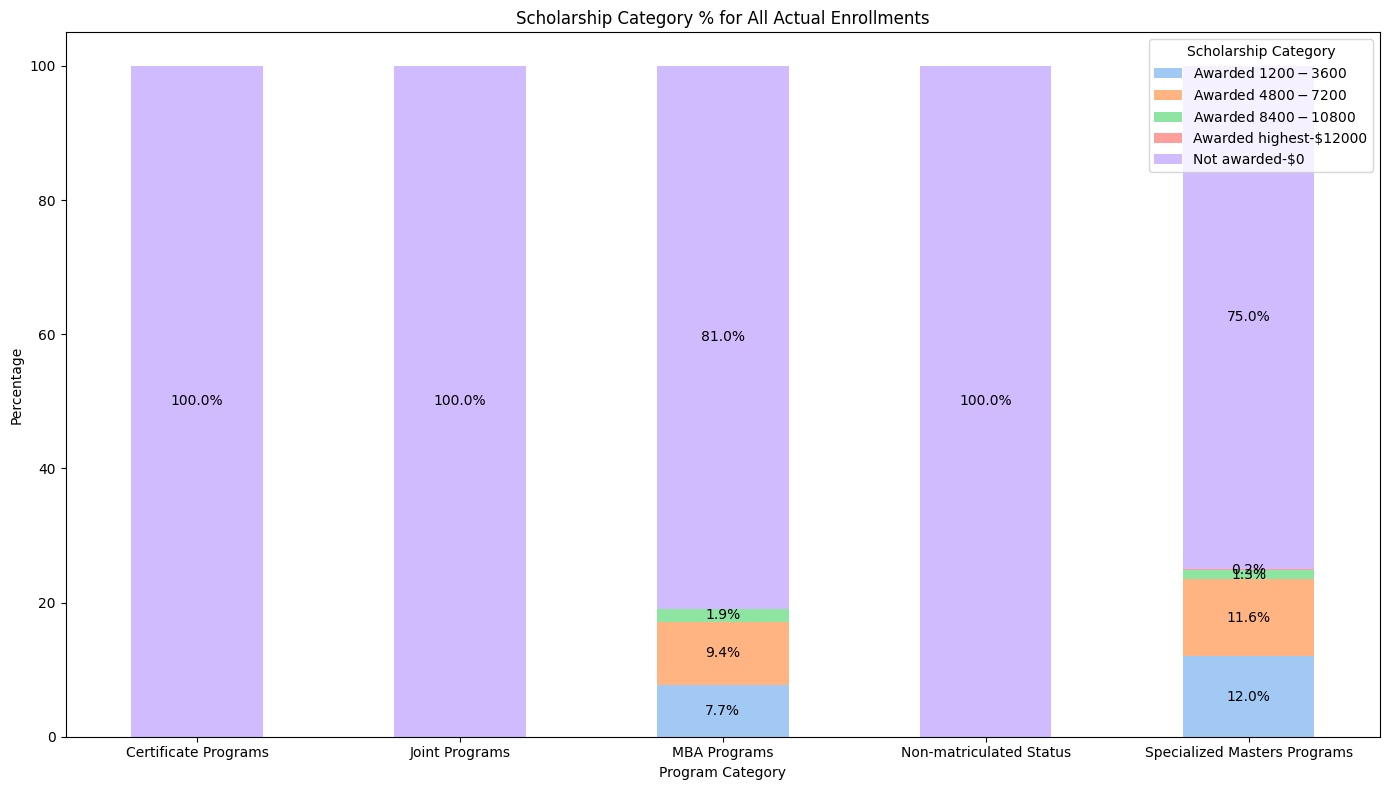

In [ ]:
# Using the provided code snippet with modifications to use subtle/light colors.

import matplotlib.pyplot as plt
import pandas as pd

# Sample data setup - replace this with actual data loading
# Assuming 'actual_enrolled' is already defined and contains the necessary columns

# Calculate the total count of each GPA category within the actual_enrolled DataFrame
total_gpa_counts = actual_enrolled['Scholarship Category'].value_counts()

# Group by 'Program Category' and 'GPA (Converted) Category' and count the instances
grouped = actual_enrolled.groupby(['Program Category', 'Scholarship Category']).size().reset_index(name='Counts')

# Pivot data for plotting to have 'Program Category' as rows and 'GPA (Converted) Category' as columns
pivot_data = grouped.pivot(index='Program Category', columns='Scholarship Category', values='Counts').fillna(0)

# Calculate percentages for each 'GPA (Converted) Category' within each 'Program Category'
# Normalize each row by the total across all GPA categories to get percentages
pivot_percentages = pivot_data.divide(pivot_data.sum(axis=1), axis=0) * 100

# Define a color palette with subtle colors
subtle_colors = sns.color_palette("pastel")

# Define the order of categories for plotting
# gpa_order = ['Low (0-2.5)', 'Medium (2.5-3.5)', 'High (3.5-4.0)', 'Unknown']

# Plot the percentages as a stacked bar chart with subtle colors
plt.figure(figsize=(14, 8))
pivot_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), color=subtle_colors)

# Add data labels
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:  # Only show labels for non-zero values
        plt.gca().text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center')

# Add labels and title
plt.xlabel('Program Category')
plt.ylabel('Percentage')
plt.title('Scholarship Category % for All Actual Enrollments')



plt.xticks(rotation=0)  # Rotate the x-axis labels to show them horizontally
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

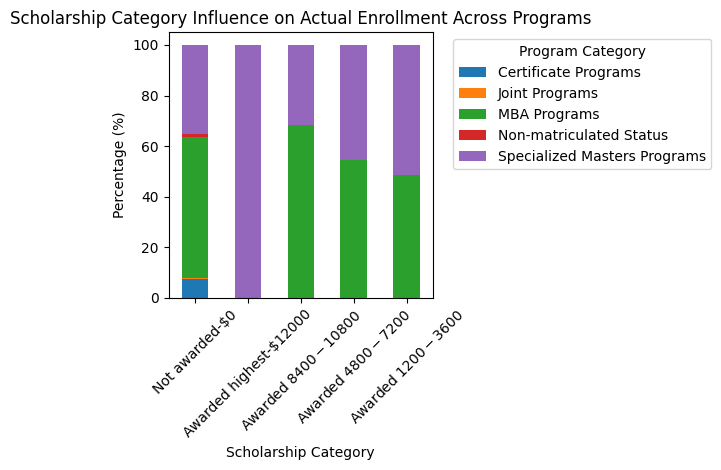

In [ ]:
# Assuming 'actual_enrolled' DataFrame is pre-defined and contains 'Program Category' and 'Scholarship Category'

# Group by 'Scholarship Category' and 'Program Category' and count the instances
grouped = actual_enrolled.groupby(['Scholarship Category', 'Program Category']).size().reset_index(name='Counts')

# Pivot data for plotting to have 'Scholarship Category' as rows and 'Program Category' as columns
pivot_percentages = grouped.pivot(index='Scholarship Category', columns='Program Category', values='Counts').fillna(0)

# Calculate percentages for each 'Program Category' within each 'Scholarship Category'
# Normalize each row by the total across all Program categories to get percentages
pivot_percentages = pivot_percentages.divide(pivot_percentages.sum(axis=1), axis=0) * 100

# Sort the pivot table by total counts in descending order to show higher enrollment categories first
pivot_percentages = pivot_percentages.sort_values(by='Scholarship Category', ascending=False)

# Plot the percentages as a stacked bar chart
plt.figure(figsize=(14, 8))
pivot_percentages.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Scholarship Category')
plt.ylabel('Percentage (%)')
plt.title('Scholarship Category Influence on Actual Enrollment Across Programs')
plt.legend(title='Program Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate the x-axis labels to show them horizontally
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


In [ ]:
colleague_unenrolled_decided

,Reference ID,Record Created Date,Primary Inquiry Program,Primary Inquiry Term,Application Referral Source,Application Created Date,Application Status,Application Program,Application Start Term,Decisions Released Date,...,Sex,Intend to apply for financial aid,Applications Registered in Colleague,Applications Scholarship Tier - Admit,GPA (Recalculated) Category,GPA (Converted) Category,Tier Number,Scholarship Amount,Scholarship Category,Age Group
0,826319459,2018-10-19 13:17:00,Business Analytics - MSBA - Online Instruction,Spring 2024,SU Web Site,2016-10-14 00:00:00,Decided,Business Administration (Professional) - MBA,Fall 2017,2019-01-05 19:00:00,...,M,1,0,Not valid for Award,Unknown,Medium (2.5-3.5),NaN,NaN,Not valid for Award,20-39
1,295633352,2018-10-19 13:17:00,Business Analytics - MSBA,Fall 2018,No referral provided,2017-12-27 00:00:00,Decided,Business Analytics - MSBA,Fall 2018,2019-02-05 12:39:00,...,F,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award,20-39
2,173111,2023-12-03 06:54:00,Business Administration (Professional) - MBA,Winter 2024,Graduate Programs Search,2023-12-03 06:56:00,Decided,Business Administration (Professional) - MBA,Winter 2024,2024-10-01 14:15:00,...,M,1,0,2023-G5 - $6000,Unknown,Unknown,5.0,6000.0,Awarded $4800-$7200,20-39
3,368489358,2018-10-19 13:04:00,Sport Business Leadership- MSBL,Summer 2017,No referral provided,2017-01-24 00:00:00,Decided,Sport Business Leadership- MSBL,Summer 2017,2019-02-05 12:47:00,...,M,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award,20-39
4,490429256,2018-10-19 13:17:00,Accounting (Professional) - MPAC,Summer 2017,No referral provided,2017-09-03 00:00:00,Decided,Accounting (Professional) - MPAC,Summer 2017,2019-02-05 12:47:00,...,F,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award,20-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,999368733,2018-10-19 13:17:00,Finance - MSF,Fall 2017,No referral provided,2018-04-18 00:00:00,Decided,Finance Certificate,Summer 2018,2019-02-05 12:55:00,...,M,0,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award,20-39
10295,908406365,2018-10-19 13:04:00,"Nurse Practitioner, Family Nurse-Adult Geronto...",Summer 2024,No referral provided,2017-12-06 00:00:00,Decided,Business Administration - Bridge - MBA,Fall 2017,2019-02-05 13:02:00,...,F,1,0,2017-G0 - $0,Unknown,Unknown,0.0,0.0,Not awarded-$0,20-39
10296,999853619,2024-08-01 23:05:00,Early Career Masters of Business Administration,Fall 2024,Friend/Co-worker,2024-02-21 20:58:00,Decided,Early Career Masters of Business Administration,Fall 2024,2024-03-04 20:38:00,...,F,0,0,2024-G3 - $3600,Unknown,Medium (2.5-3.5),3.0,3600.0,Awarded $1200-$3600,20-39
10298,999954081,2021-09-26 19:35:00,Finance - MSF,Winter 2022,Campus Event,2021-09-26 19:36:00,Decided,Finance - MSF,Winter 2022,2022-01-18 11:30:00,...,M,0,0,Not valid for Award,Unknown,Medium (2.5-3.5),NaN,NaN,Not valid for Award,20-39


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/810361863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colleague_unenrolled_decided['Application Created Date'] = pd.to_datetime(colleague_unenrolled_decided['Application Created Date'], errors='coerce')
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/810361863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colleague_unenrolled_decided['Decisions Released Date'] = pd.to_datetime(colleague_unenrolled_decided['Decisi

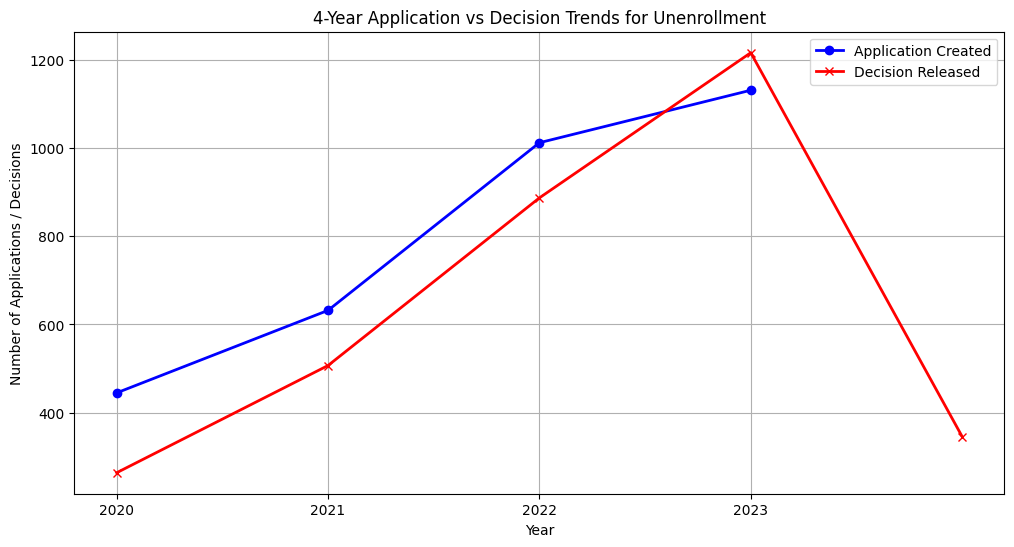

In [ ]:
# Ensure both date columns are in datetime format
colleague_unenrolled_decided['Application Created Date'] = pd.to_datetime(colleague_unenrolled_decided['Application Created Date'], errors='coerce')
colleague_unenrolled_decided['Decisions Released Date'] = pd.to_datetime(colleague_unenrolled_decided['Decisions Released Date'], errors='coerce')

# Filter data for the last four years only
recent_data = colleague_unenrolled_decided[(colleague_unenrolled_decided['Application Created Date'].dt.year >= 2020) & (colleague_unenrolled_decided['Application Created Date'].dt.year <= 2023)]

# Group by year and count the number of applications
application_trend = recent_data.groupby(recent_data['Application Created Date'].dt.year).size()

# Similarly, group by year for the decisions released
decision_trend = recent_data.groupby(recent_data['Decisions Released Date'].dt.year).size()

# Plotting both trends
plt.figure(figsize=(12, 6))
application_trend.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2, label='Application Created')
decision_trend.plot(kind='line', marker='x', linestyle='-', color='r', linewidth=2, label='Decision Released')
plt.title('4-Year Application vs Decision Trends for Unenrollment')
plt.xlabel('Year')
plt.ylabel('Number of Applications / Decisions')
plt.legend()
plt.grid(True)
plt.xticks(list(range(2020, 2024)))  # Ensure all years are shown
plt.show()


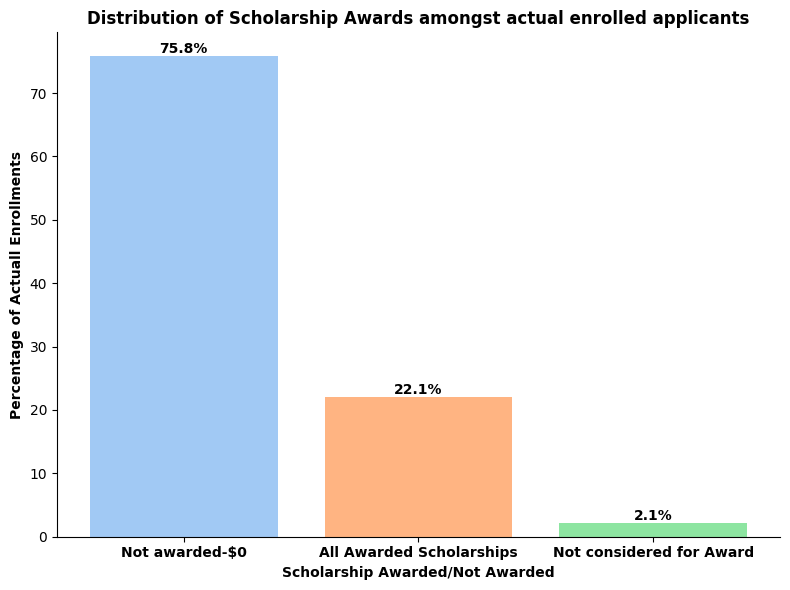

In [ ]:
# Assuming 'actual_enrolled' DataFrame is pre-defined and contains 'Scholarship Category'

# Calculate the count of 'Not awarded-$0' and other scholarship categories
scholarship_counts = colleague_enrolled_all['Scholarship Category'].value_counts()
not_awarded_count = scholarship_counts.get('Not awarded-$0', 0)
not_valid_count = scholarship_counts.get('Not valid for Award', 0)
other_scholarship_count = scholarship_counts.sum() - not_awarded_count - not_valid_count

# Calculate the percentage of each scholarship type
total_count = not_awarded_count + other_scholarship_count + not_valid_count
percent_not_awarded = (not_awarded_count / total_count) * 100
percent_other_scholarship = (other_scholarship_count / total_count) * 100
percent_not_considered = (not_valid_count / total_count) * 100

# Prepare data for plotting
scholarship_data = {
    'Not awarded-$0': percent_not_awarded,
    'All Awarded Scholarships': percent_other_scholarship,
    'Not considered for Award': percent_not_considered
}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(scholarship_data.keys(), scholarship_data.values(), color=sns.color_palette("pastel"))

# Add data labels
for i, (label, percent) in enumerate(scholarship_data.items()):
    plt.text(i, percent, f'{percent:.1f}%', ha='center', va='bottom', fontweight='bold')

# Add labels and title
plt.xlabel('Scholarship Awarded/Not Awarded', fontweight='bold')
plt.ylabel('Percentage of Actuall Enrollments', fontweight='bold')
plt.title('Distribution of Scholarship Awards amongst actual enrolled applicants', fontweight='bold')
plt.xticks(fontweight='bold')
sns.despine(left=False, bottom=False)  # To remove the borders

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df['Race'].unique()

array(['More than one race', 'Unknown', 'Black or African American',
       'White - Caucasian/European', 'Asian - Indian', 'White - Persian',
       'White - Middle Eastern', 'Asian - Chinese', 'Asian - South Asian',
       'Asian - Korean', 'Asian - Filipino',
       'White - Russian/Eastern European', 'Asian',
       'Asian - Asian American', 'Asian - Vietnamese',
       'Black or African American - Caribbean', 'Asian - Pakistani',
       'Asian - Indonesian', 'White - Arab',
       'Native Hawaiian or Other Pacific Islander - Guamanian/Chamorro',
       'Asian - Southeast Asian', 'White - Israeli',
       'American Indian or Alaska Native', 'White - Turk',
       'Asian - East Asian', 'Asian - Japanese',
       'Native Hawaiian or Other Pacific Islander',
       'Native Hawaiian or Other Pacific Islander - Native Hawaiian',
       'Native Hawaiian or Other Pacific Islander - Samoan',
       'Black or African American - West Indian'], dtype=object)

Processing time from application to decision

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/3982242114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_enrolled['Sex'] = actual_enrolled['Sex'].replace({'F': 'Female', 'M': 'Male', 'U': 'Unknown'})
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/3982242114.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=sex_counts.values, y=sex_counts.index, palette='pastel', orient='h')


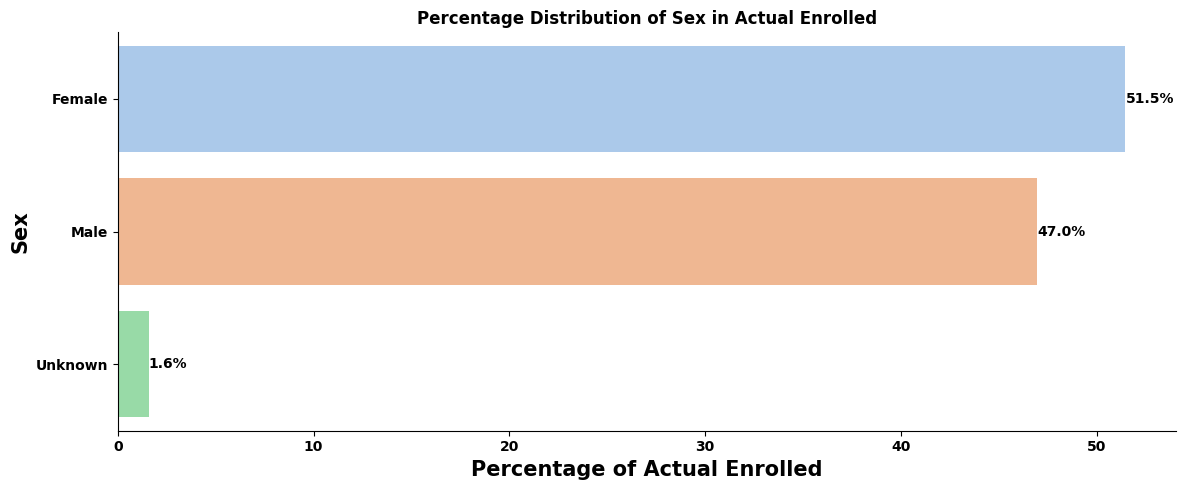

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'actual_enrolled' DataFrame is pre-defined and contains 'Sex'
# Rename the categories in the 'Sex' column for clarity
actual_enrolled['Sex'] = actual_enrolled['Sex'].replace({'F': 'Female', 'M': 'Male', 'U': 'Unknown'})

# Calculate the percentage distribution of the 'Sex' column
sex_counts = actual_enrolled['Sex'].value_counts(normalize=True) * 100

# Create a horizontal bar plot
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(x=sex_counts.values, y=sex_counts.index, palette='pastel', orient='h')

# Add percentage labels next to each bar
for bar in bar_plot.patches:
    plt.text(
        bar.get_width(),  # Position the text at the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically in the bar
        f'{bar.get_width():.1f}%',  # Format the value as a percentage
        va='center',  # Vertically align the text to the center
        fontweight='bold'
    )

# Set the labels and title
plt.xlabel('Percentage of Actual Enrolled', fontweight='bold', fontsize = 15)
plt.ylabel('Sex', fontweight='bold', fontsize = 15)
plt.title('Percentage Distribution of Sex in Actual Enrolled', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
sns.despine(left=False, bottom=False)  # To remove the borders
plt.tight_layout()
# Show the plot
plt.show()


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/152005329.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_enrolled['Country Classification'] = actual_enrolled['Country'].apply(
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/152005329.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  country_barplot = sns.barplot(x=country_counts.index, y=country_counts.values, palette='pastel')


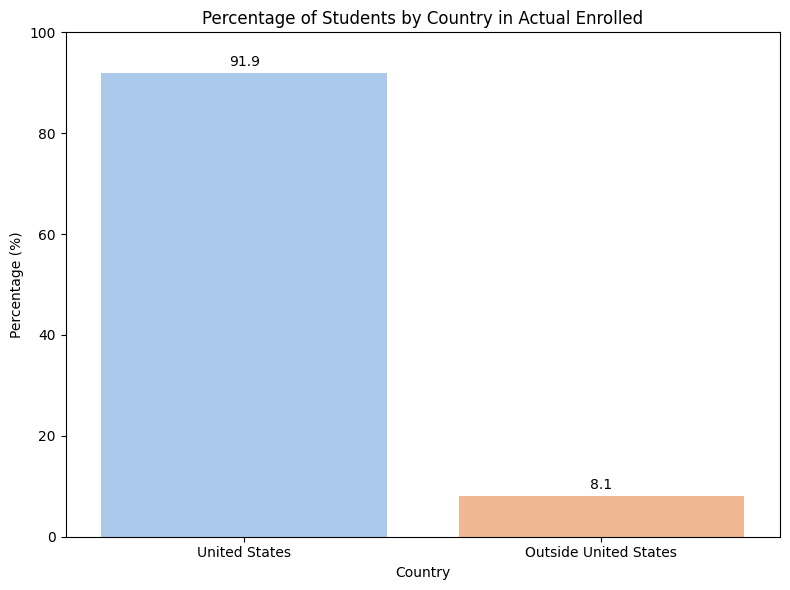

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'actual_enrolled' is your DataFrame and it has a 'Country' column.

# Create a new column classifying 'United States' vs 'Other'
actual_enrolled['Country Classification'] = actual_enrolled['Country'].apply(
    lambda x: 'United States' if x == 'United States' else 'Outside United States'
)

# Calculate percentages
country_counts = actual_enrolled['Country Classification'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
country_barplot = sns.barplot(x=country_counts.index, y=country_counts.values, palette='pastel')

# Add labels
for bar in country_barplot.patches:
    country_barplot.annotate(format(bar.get_height(), '.1f'),
                             (bar.get_x() + bar.get_width() / 2,
                              bar.get_height()), ha='center', va='center',
                             size=10, xytext=(0, 8),
                             textcoords='offset points')

plt.title('Percentage of Students by Country in Actual Enrolled')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/3355949317.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_enrolled['Race Category'] = actual_enrolled['Race'].map(race_mapping)
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/3355949317.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_enrolled['Race Category'] = actual_enrolled['Race Category'].fillna('Other')
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/3355949317.py:46: FutureWarn

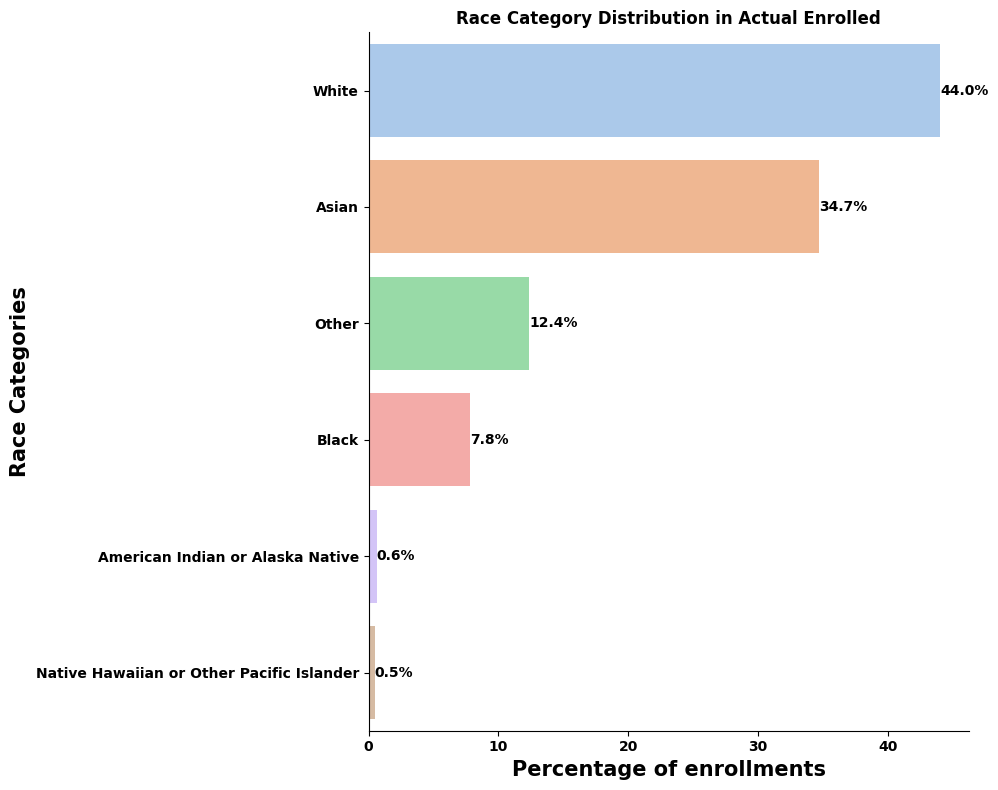

In [ ]:
# This code assumes that 'actual_enrolled' DataFrame is pre-defined and contains a 'Race' column.
# You will need to define 'actual_enrolled' and ensure the 'Race' column exists before using this code.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the race categories
race_categories = {
    'White': ['White - Caucasian/European', 'White - Persian', 'White - Middle Eastern', 
              'White - Russian/Eastern European', 'White - Arab', 'White - Israeli', 'White - Turk'],
    'Asian': ['Asian - Indian', 'Asian - Chinese', 'Asian - South Asian', 'Asian - Korean', 
              'Asian - Filipino', 'Asian', 'Asian - Asian American', 'Asian - Vietnamese', 
              'Asian - Pakistani', 'Asian - Indonesian', 'Asian - Southeast Asian', 
              'Asian - East Asian', 'Asian - Japanese'],
    'Black': ['Black or African American', 'Black or African American - Caribbean', 
              'Black or African American - West Indian'],
    'Native Hawaiian or Other Pacific Islander': [
              'Native Hawaiian or Other Pacific Islander - Guamanian/Chamorro', 
              'Native Hawaiian or Other Pacific Islander', 
              'Native Hawaiian or Other Pacific Islander - Native Hawaiian', 
              'Native Hawaiian or Other Pacific Islander - Samoan'],
    'American Indian or Alaska Native': ['American Indian or Alaska Native'],
    'Other': ['More than one race', 'Unknown']
}

# Reverse the dictionary to map individual race to the broad category
race_mapping = {race: category for category, races in race_categories.items() for race in races}

# Map the 'Race' column in actual_enrolled to the broad categories
actual_enrolled['Race Category'] = actual_enrolled['Race'].map(race_mapping)

# If any race is not found in the mapping, classify it as 'Other'
actual_enrolled['Race Category'] = actual_enrolled['Race Category'].fillna('Other')


# Plot the distribution of 'Race Category' classification in percentage, ordered from highest to lowest
race_counts = actual_enrolled['Race Category'].value_counts(normalize=True) * 100
race_counts_sorted = race_counts.sort_values(ascending=True)  # For horizontal bars, we sort ascending

# Assuming 'race_percentages' is a Series with the index as race categories and values as percentages
race_percentages_sorted = race_counts.sort_values(ascending=False)

# Now, you can plot this sorted Series using Seaborn's barplot function.
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=race_percentages_sorted.values, y=race_percentages_sorted.index, palette='pastel', orient='h')

# Iterate over the bars in the barplot object and place the text annotation
for bar in barplot.patches:
    bar_width = bar.get_width()  # Get the width of the bar (which is the percentage)
    plt.text(bar_width, bar.get_y() + bar.get_height()/2,
             f'{bar_width:.1f}%',  # The annotation text
             va='center', ha='left', fontweight='bold')  # Center alignment for the text

# Customize the plot as needed, remove axes, add title, etc.
plt.xlabel('Percentage of enrollments' , fontweight = 'bold', fontsize = 15)
plt.ylabel('Race Categories', fontweight='bold', fontsize = 15)
plt.title('Race Category Distribution in Actual Enrolled', fontweight='bold')
sns.despine(left=False, bottom=False)  # To remove the borders
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/2436110914.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_enrolled['Age Group'] = pd.cut(actual_enrolled['Age'], bins=age_bins, labels=age_labels)


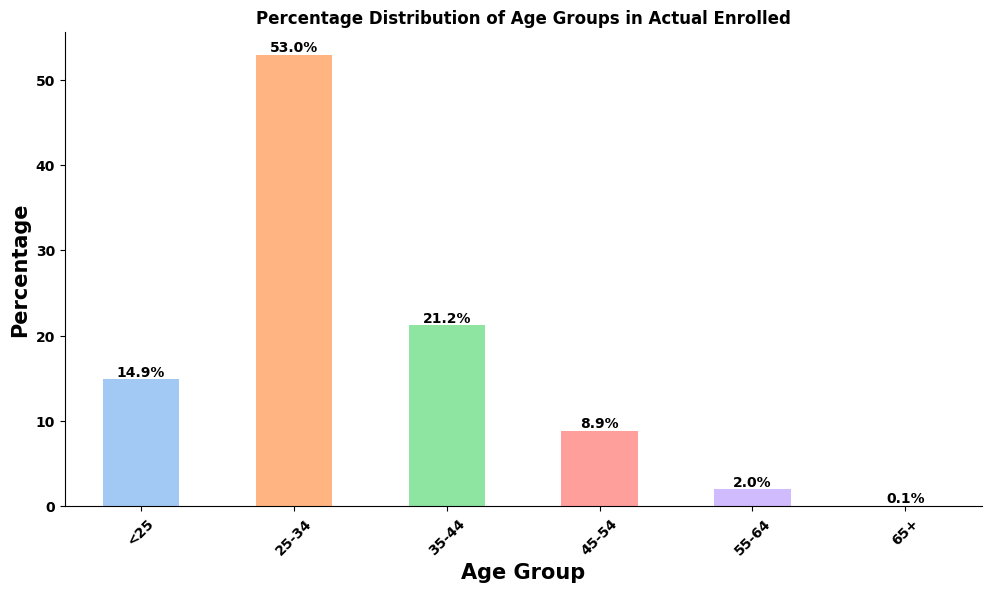

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'actual_enrolled' DataFrame is already defined and contains an 'Age' column
# First, we will create age groups and then calculate the percentage for each group

# Define age bins and labels for categorization
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

# Categorize ages in the actual_enrolled DataFrame
actual_enrolled['Age Group'] = pd.cut(actual_enrolled['Age'], bins=age_bins, labels=age_labels)

# Calculate the percentage of each age group
age_group_percentage = actual_enrolled['Age Group'].value_counts(normalize=True).sort_index() * 100

# Plot the age group distribution
plt.figure(figsize=(10, 6))
age_group_percentage.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Percentage Distribution of Age Groups in Actual Enrolled' ,fontweight='bold' )
plt.xlabel('Age Group', fontweight='bold', fontsize= 15)
plt.ylabel('Percentage', fontweight='bold', fontsize= 15)
plt.xticks(rotation=45)
sns.despine(left=False, bottom=False)  # To remove the borders
# Annotate percentage on the bars
for index, value in enumerate(age_group_percentage):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


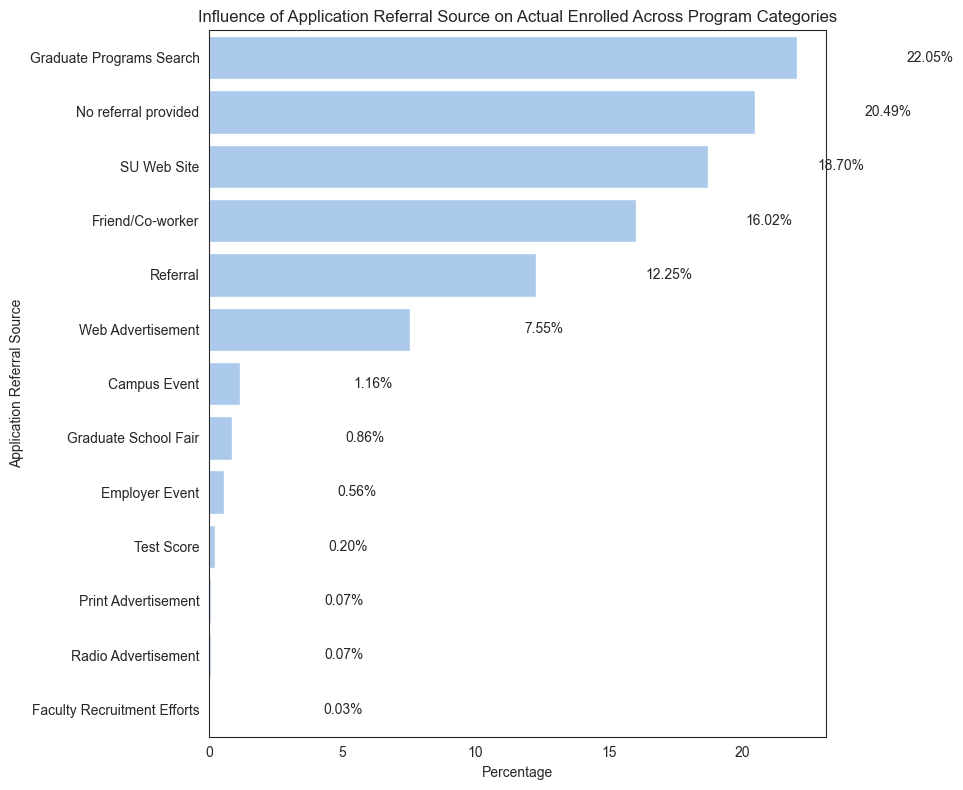

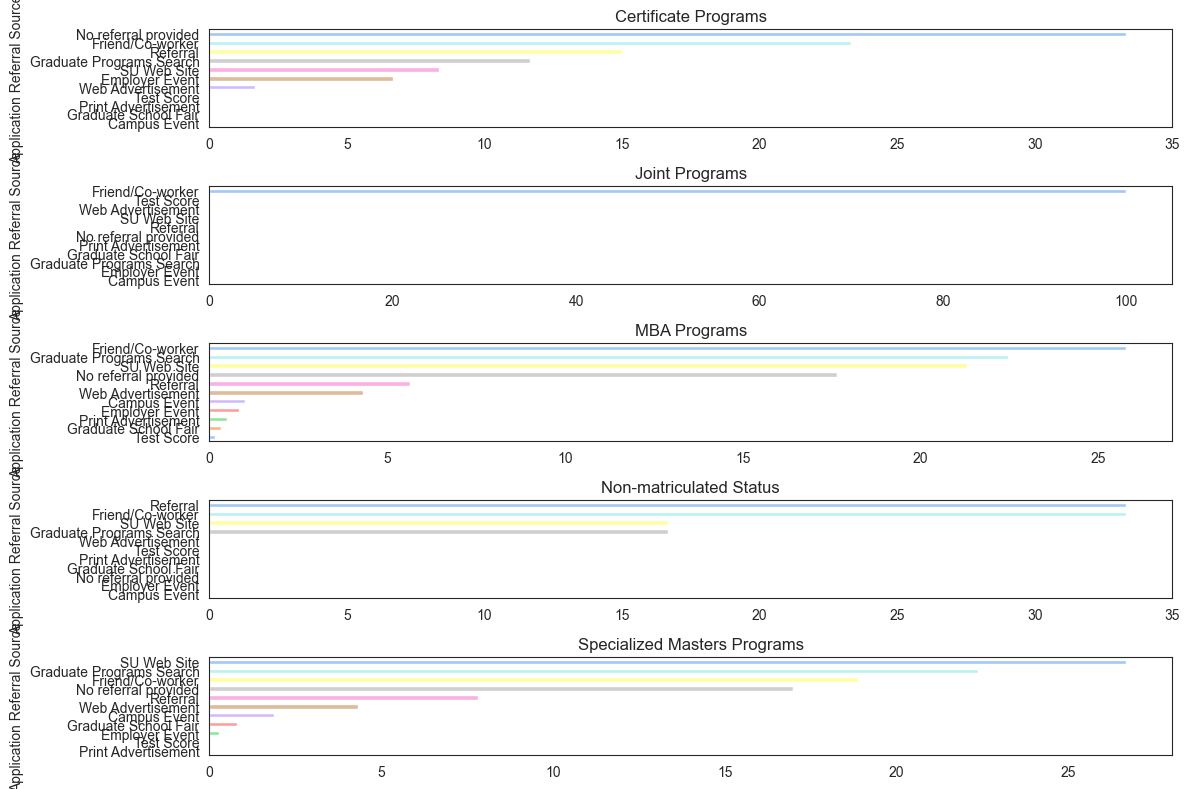

In [ ]:
# Assuming 'actual_enrolled' DataFrame is pre-defined and contains 'Application Referral Source' and 'Program Category'
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of each referral source within actual_enrolled
referral_counts = colleague_unenrolled_decided['Application Referral Source'].value_counts()

# Calculate percentages
referral_percentages = referral_counts / referral_counts.sum() * 100

# If there are many unique sources, plot horizontally for better readability
plt.figure(figsize=(10, 8))
sns.set_palette("pastel")
referral_plot = sns.barplot(y=referral_percentages.index, x=referral_percentages.values, orient='h')

# Annotate the percentages on the bars
for p in referral_plot.patches:
    width = p.get_width()
    plt.text(5 + width, p.get_y() + p.get_height() / 2,
             '{:1.2f}%'.format(width),
             ha='center', va='center')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('Application Referral Source')
plt.title('Influence of Application Referral Source on Actual Enrolled Across Program Categories')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# For visualization across program categories, we need to group the data accordingly and calculate percentages within each category.
grouped_referral = actual_enrolled.groupby(['Program Category', 'Application Referral Source']).size().unstack(fill_value=0)

# Calculate percentages within each program category
grouped_referral_percentages = grouped_referral.div(grouped_referral.sum(axis=1), axis=0) * 100

# Plot the data for each program category
fig, axes = plt.subplots(nrows=len(grouped_referral_percentages), ncols=1, figsize=(12, 8))

for (category, data), ax in zip(grouped_referral_percentages.iterrows(), axes):
    data.sort_values().plot(kind='barh', ax=ax, color=sns.color_palette("pastel"))
    ax.set_title(category)
    
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()



Top 5 and bottom 5 from enrolled and unenerolled

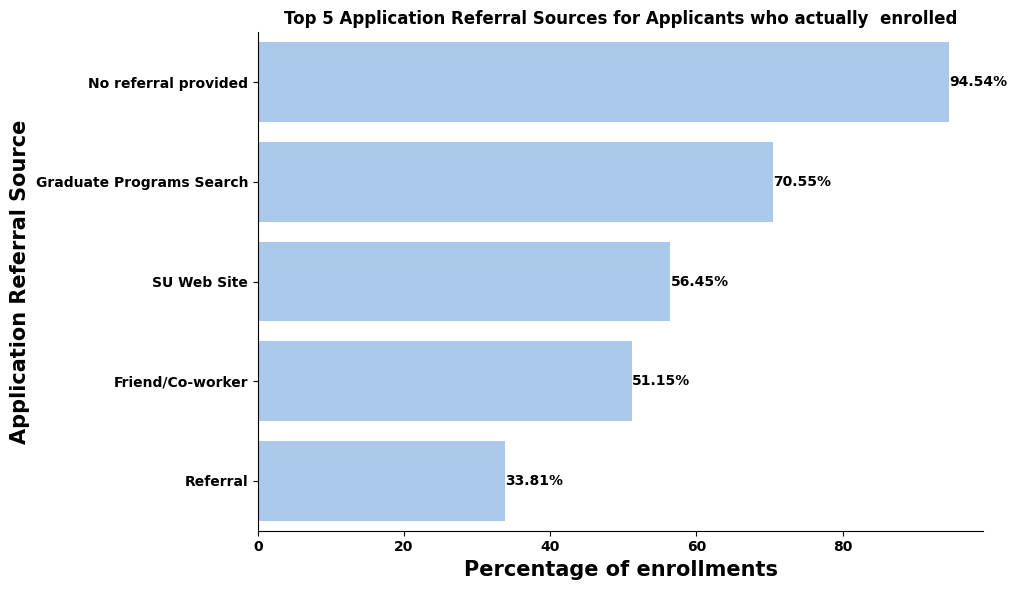

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'actual_enrolled' DataFrame is pre-defined and contains 'Application Referral Source' and 'Program Category'
# Calculate the count of each referral source within actual_enrolled
referral_counts = colleague_unenrolled_decided['Application Referral Source'].value_counts()

# Keep only the top 5 sources
top_referral_counts = referral_counts.nlargest(5)

# Calculate percentages for the top 5 sources
top_referral_percentages = top_referral_counts / actual_enrolled.shape[0] * 100

# Plot horizontally for better readability if there are many unique sources
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
referral_plot = sns.barplot(y=top_referral_percentages.index, x=top_referral_percentages.values, orient='h')

# Annotate the percentages on the bars
for p in referral_plot.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2,
             '{:1.2f}%'.format(width),
             ha='left', va='center', fontweight='bold')

# Set labels and title
plt.xlabel('Percentage of enrollments',fontweight='bold', fontsize =15 )
plt.ylabel('Application Referral Source', fontweight='bold', fontsize=15)
plt.title('Top 5 Application Referral Sources for Applicants who actually  enrolled', fontweight='bold')
sns.despine(left=False, bottom=False)  # To remove the borders
# Adjust the layout
plt.tight_layout()
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
# Show the plot
plt.show()


<Figure size 1400x1000 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


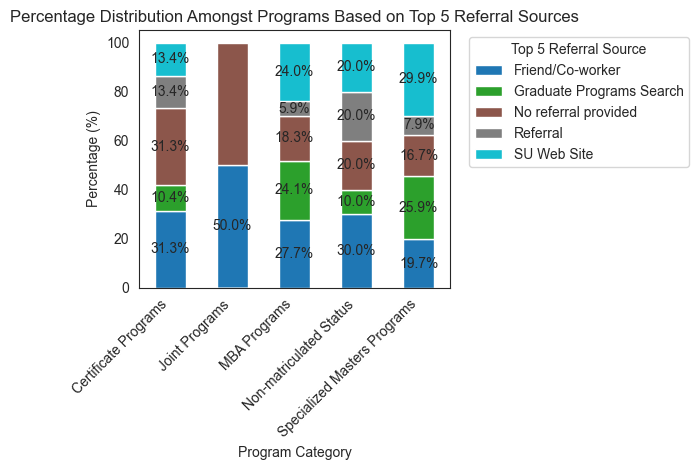

In [ ]:
# Assuming 'actual_enrolled' DataFrame is pre-defined and contains 'Application Referral Source' and 'Program Category'

# Find the top 5 sources based on their count in the 'actual_enrolled' DataFrame
top_5_sources = actual_enrolled['Application Referral Source'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 referral sources
filtered_data = actual_enrolled[actual_enrolled['Application Referral Source'].isin(top_5_sources)]

# Group the data by 'Program Category' and 'Application Referral Source' and get the size
grouped_data = filtered_data.groupby(['Program Category', 'Application Referral Source']).size().unstack()

# Calculate the percentage distribution amongst the programs based on only the top 5 sources
percentage_distribution = grouped_data.divide(grouped_data.sum(axis=1), axis=0) * 100

# Plot the percentage distribution as a stacked bar chart
plt.figure(figsize=(14, 10))
percentage_distribution.plot(kind='bar', stacked=True, colormap='tab10')

# Add data labels
for n, bar_group in enumerate(percentage_distribution.values):
    bars_sum = 0  # Keep a sum of the bars' heights for stacked bars
    for index, value in enumerate(bar_group):
        if value:  # Only if there is a value
            plt.text(n, bars_sum + (value/2), f'{value:.1f}%', ha='center', va='center')
        bars_sum += value

# Set the x-label, y-label, and plot title
plt.xlabel('Program Category')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution Amongst Programs Based on Top 5 Referral Sources')

# Rotate the x-axis labels so they fit better
plt.xticks(rotation=45, ha='right')

# Move the legend out of the plot
plt.legend(title='Top 5 Referral Source', bbox_to_anchor=(1.04,1), loc='upper left')

plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values


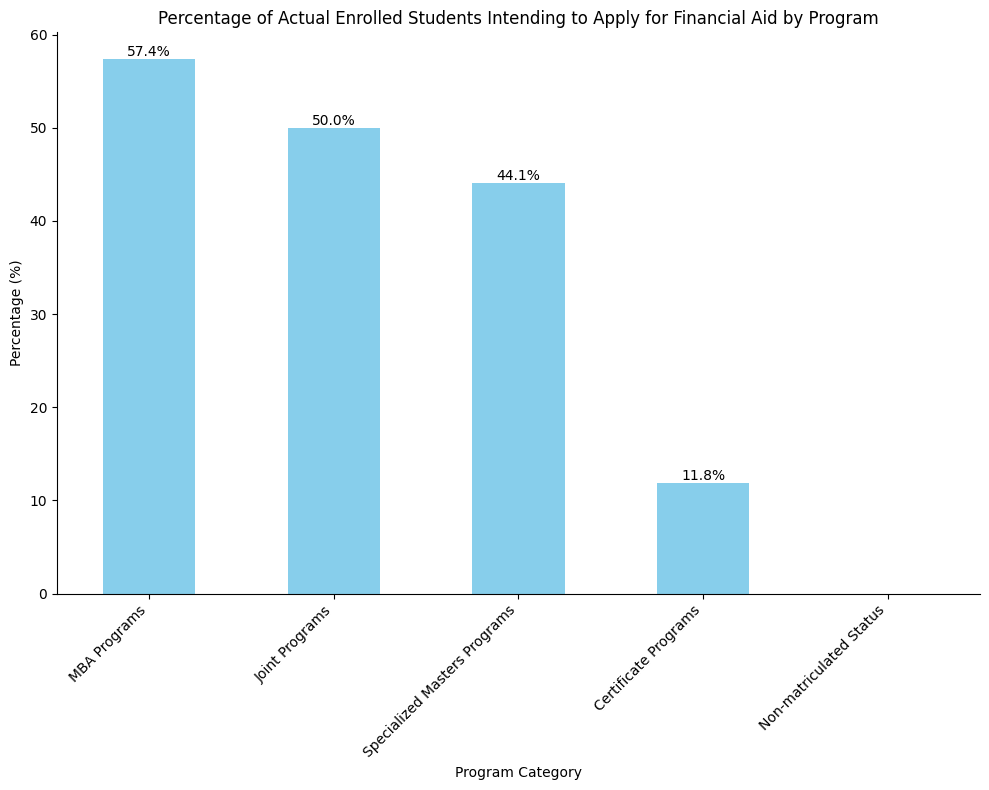

In [ ]:
# Assuming 'actual_enrolled' DataFrame is pre-defined and contains 'Intend to apply for financial aid' and 'Program Category'

# Count the number of students who intend to apply for financial aid within each program category
aid_counts = actual_enrolled.groupby(['Program Category', 'Intend to apply for financial aid']).size().unstack()

# Calculate the percentage of students intending to apply for financial aid within each program category
aid_percentages = aid_counts.divide(aid_counts.sum(axis=1), axis=0) * 100

# Select only the percentage of students who intend to apply for financial aid
aid_intent_percentages = aid_percentages.loc[:, 1]  # Assuming 1 indicates intent to apply

# Sort the percentages in descending order for better visualization
aid_intent_percentages = aid_intent_percentages.sort_values(ascending=False)

# Plot the percentage of students intending to apply for financial aid across programs
plt.figure(figsize=(10, 8))
aid_intent_percentages.plot(kind='bar', color='skyblue')

# Add data labels
for index, value in enumerate(aid_intent_percentages):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Set the x-label, y-label, and plot title
plt.xlabel('Program Category')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Actual Enrolled Students Intending to Apply for Financial Aid by Program')

# Rotate the x-axis labels so they fit better
plt.xticks(rotation=45, ha='right')
sns.despine(left=False, bottom=False)  # To remove the borders
plt.tight_layout()
plt.show()


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65869/4270694564.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=percentage_values, palette='pastel')


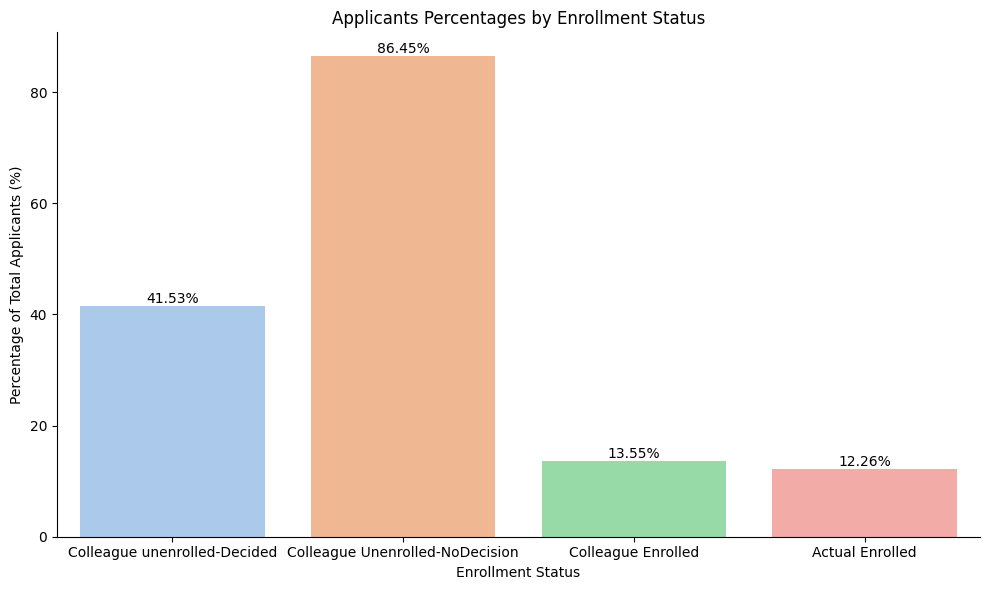

In [ ]:
import matplotlib.pyplot as plt

# Example values, replace with actual counts
total_applicants = 10300  # Replace with actual total applicants count
counts = {
    'Colleague unenrolled-Decided': 4278,  # Replace with actual count
    'Colleague Unenrolled-NoDecision': 8904,  # Replace with actual count
    'Colleague Enrolled': 1396,  # Replace with actual count
    'Actual Enrolled': 1263  # Replace with actual count
}

# Calculate the percentage of each subset
percentages = {k: (v / total_applicants) * 100 for k, v in counts.items()}

# Values for plotting
categories = list(percentages.keys())
percentage_values = list(percentages.values())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=percentage_values, palette='pastel')

# Add percentage labels on top of each bar
for i, value in enumerate(percentage_values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Add labels and title
plt.title('Applicants Percentages by Enrollment Status')
plt.xlabel('Enrollment Status')
plt.ylabel('Percentage of Total Applicants (%)')

# Adjust the x-axis labels to prevent overlapping
plt.xticks()
sns.despine(left=False, bottom=False)  # To remove the borders
# Show the plot
plt.tight_layout()
plt.show()


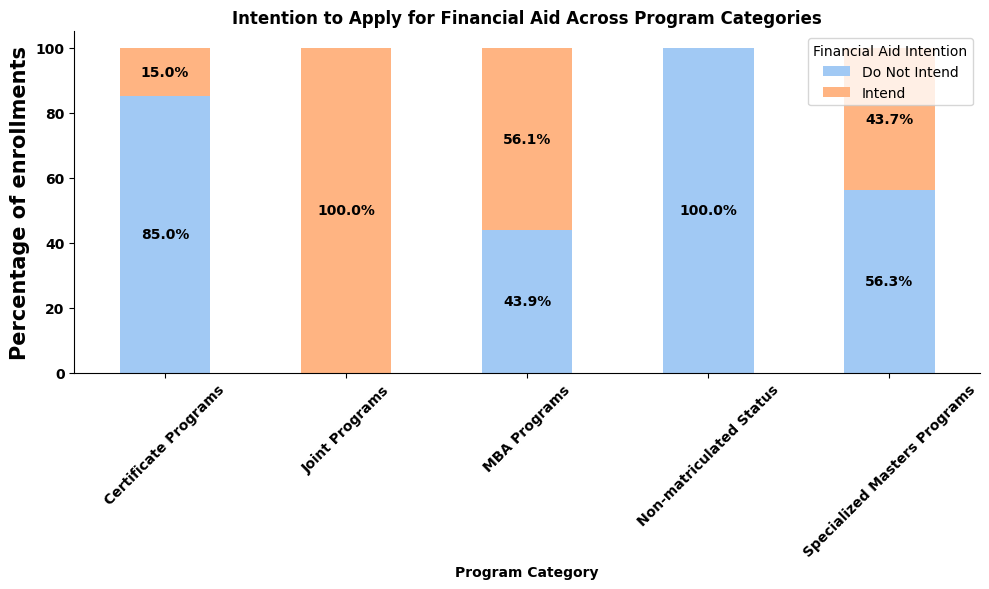

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'Intend to apply for financial aid' is a binary column (0 and 1)
# and 'Program Category' is already added to your 'actual_enrolled' DataFrame

# Group the data by 'Program Category' and 'Intend to apply for financial aid' and get the size
grouped_data = actual_enrolled.groupby(['Program Category', 'Intend to apply for financial aid']).size().unstack(fill_value=0)

# Calculate the percentage for intention (1) and no intention (0)
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create the bar plot
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding the data labels
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')

plt.xlabel('Program Category', fontweight='bold', fontsize=10)
plt.ylabel('Percentage of enrollments', fontweight='bold', fontsize=15)
plt.title('Intention to Apply for Financial Aid Across Program Categories', fontweight='bold')
plt.legend(title='Financial Aid Intention', labels=['Do Not Intend', 'Intend'], loc='upper right')
plt.xticks(rotation=45)
sns.despine(left=False, bottom=False)  # To remove the borders
# Adjust the layout
plt.tight_layout()
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


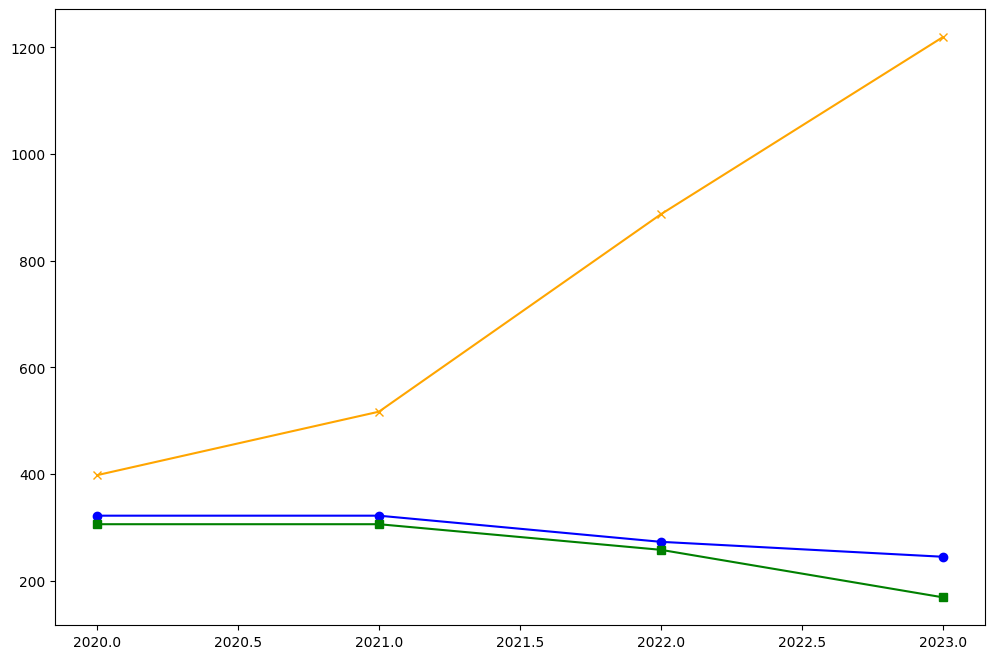

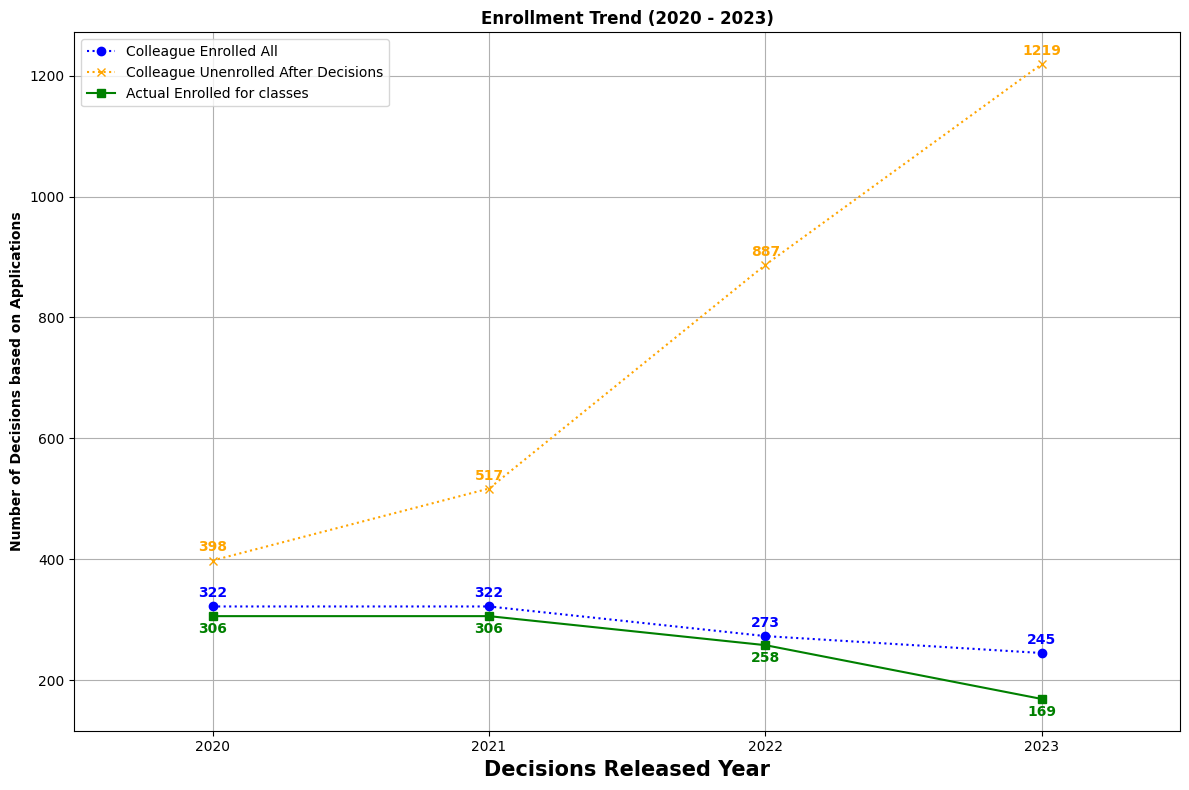

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data has been properly grouped and filtered.
colleague_enrolled_all['Year'] = pd.to_datetime(colleague_enrolled_all['Decisions Released Date']).dt.year
colleague_unenrolled_decided['Year'] = pd.to_datetime(colleague_unenrolled_decided['Decisions Released Date']).dt.year
actual_enrolled['Year'] = pd.to_datetime(actual_enrolled['Decisions Released Date']).dt.year
# Filter the DataFrame to only include records from 2020 to 2023
colleague_enrolled_all = colleague_enrolled_all[(colleague_enrolled_all['Year'] >= 2020) & (colleague_enrolled_all['Year'] <= 2023)]
colleague_unenrolled_decided = colleague_unenrolled_decided[(colleague_unenrolled_decided['Year'] >= 2020) & (colleague_unenrolled_decided['Year'] <= 2023)]
actual_enrolled = actual_enrolled[(actual_enrolled['Year'] >= 2020) & (actual_enrolled['Year'] <= 2023)]

# Now, group by 'Year' and count the number of decisions
trend_enrolled_all = colleague_enrolled_all.groupby('Year').size()
trend_unenrolled_all = colleague_unenrolled_decided.groupby('Year').size()
trend_actual_enrolled = actual_enrolled.groupby('Year').size()

# Plot the trends for each subset
plt.figure(figsize=(12, 8))

# Check if the trends are not empty and plot them with annotations
if not trend_enrolled_all.empty:
    plt.plot(trend_enrolled_all.index, trend_enrolled_all.values, marker='o', label='Colleague Enrolled All', color='blue')

if not trend_unenrolled_all.empty:
    plt.plot(trend_unenrolled_all.index, trend_unenrolled_all.values, marker='x', label='Colleague Unenrolled All', color='orange')

if not trend_actual_enrolled.empty:
    plt.plot(trend_actual_enrolled.index, trend_actual_enrolled.values, marker='s', label='Actual Enrolled for classes', color='green')

# Plot the trends for each subset
plt.figure(figsize=(12, 8))

# Plot each subset with clear markers and lines
# Colleague Enrolled All - Dotted Line
plt.plot(trend_enrolled_all.index, trend_enrolled_all.values, marker='o', color='blue', linestyle=':', label='Colleague Enrolled All')

# Colleague Unenrolled All - Dotted Line
plt.plot(trend_unenrolled_all.index, trend_unenrolled_all.values, marker='x', color='orange', linestyle=':', label='Colleague Unenrolled After Decisions')

# Actual Enrolled for classes - Solid Line
plt.plot(trend_actual_enrolled.index, trend_actual_enrolled.values, marker='s', color='green', linestyle='-', label='Actual Enrolled for classes')

# Add data labels to each point
for x, y in zip(trend_enrolled_all.index, trend_enrolled_all.values):
    plt.text(x, y + 10, f'{y}', ha='center', va='bottom', color='blue', fontsize=10, fontweight='bold')

for x, y in zip(trend_unenrolled_all.index, trend_unenrolled_all.values):
    plt.text(x, y + 10, f'{y}', ha='center', va='bottom', color='orange', fontsize=10, fontweight='bold')

# For Actual Enrolled, place the annotation below the line
for x, y in zip(trend_actual_enrolled.index, trend_actual_enrolled.values):
    plt.text(x, y - 10, f'{y}', ha='center', va='top', color='green', fontsize=10, fontweight='bold')  # 'va' changed to 'top'

# Formatting the plot
plt.title('Enrollment Trend (2020 - 2023)', fontweight='bold')
plt.xlabel('Decisions Released Year', fontweight='bold', fontsize=15)
plt.ylabel('Number of Decisions based on Applications', fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks([2020, 2021, 2022, 2023])  # Set x-ticks to years from 2020 to 2023
plt.xlim(2019.5, 2023.5)  # Set x-axis limits to provide space for annotations
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'actual_enrolled' contains the necessary date columns and 'Program Category'

# Convert dates to datetime format if they're not already
df['Application Created Date'] = pd.to_datetime(df['Application Created Date'], errors='coerce')
display_pdf['Decisions Released Date'] = pd.to_datetime(df['Decisions Released Date'], errors='coerce')

# Calculate the time taken for decision processing
df['Processing Time (days)'] = (df['Decisions Released Date'] - df['Application Created Date']).dt.days

# Group by 'Program Category' and calculate the average processing time
average_processing_time = df.groupby('Program Category')['Processing Time (days)'].mean().sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=average_processing_time.values, y=average_processing_time.index, palette='coolwarm')

# Add data labels to each bar
for bar in bar_plot.patches:
    plt.text(bar.get_width(),  # x-coordinate position of data label, adjusted a little to the right
             bar.get_y() + bar.get_height() / 2,  # y-coordinate position of data label, centered
             f'{bar.get_width():.2f}',  # data label, formatted to include decimals
             va='center')  # center alignment

plt.title('Average Processing Time by Program Category')
plt.xlabel('Average Processing Time (days)')
plt.ylabel('Program Category')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


NameError: name 'display_pdf' is not defined